# Portland, Oregon Python automatic variable generation file for Circular Buffer

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [1]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [2]:
#conda activate geo_env


In [3]:
#python -m ipykernel install --user --name geo_env

In [4]:
import geopandas as gpd

In [5]:
import pandas as pd
from functools import reduce

In [6]:
import sys
'geopandas' in sys.modules

True

In [7]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [9]:
#buffer size in meter
size=160.934 #in m, this input is also required for area conversation, 1 mile=1609.34, 0.5 mile=804.672,1.5 mile=2414.02, 2 mile=3218.69

In [10]:
# Import the non-fill buffer shape file
# nf=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-pc-yearly.csv")
# nf=nf[nf["year"]==2019]
# nf.head()

In [11]:
# Get the count location 
# c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites.csv")
# c1=c1[c1["region"]=="Portland"]
# c1=c1[c1["sensor_type"]=="permanent"]
# c1.head(5)
#print(c1.shape)

In [12]:
# merge by site_id
# nf1=pd.merge(nf,c1, right_on='site_id', left_on='site_id',how='inner')
# nf1.head(5)

In [13]:
# emerging_data=nf1.loc[:,['osm_id_sensor','site_id','sensor_type','adb','aadb1','stv_adb','stv_c_adb','stl_raw']]
# emerging_data.columns=['osm_id','site_id','sensor_type','adb','aadb1','stv_adb','stv_c_adb','stl_raw']
# emerging_data.head(3)

# Input the Strava Annual Network shape file here

In [14]:
strava=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/strava-annual-portland-osm-2019.shp")
# Exlcude Clazz=91 and 92 as those are sidewalks and stairs
strava1=strava.loc[~((strava['CLAZZ'] == 91.0) |  (strava['CLAZZ'] == 92.0)),:]
print(strava1.crs)
# Define the current EPSG
strava2 = strava1.set_crs("EPSG:2913")
# Let's take a copy of our layer
strava_proj = strava2.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2838)
strava_proj.shape

epsg:2913


(84083, 10)

# Input Bike share data here

In [15]:
# bs1=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_01.csv")
# bs2=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_02.csv")
# bs3=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_03.csv")
# bs4=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_04.csv")
# bs5=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_05.csv")
# bs6=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_06.csv")
# bs7=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_07.csv")
# bs8=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_08.csv")
# bs9=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_09.csv")
# bs10=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_10.csv")
# bs11=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_11.csv")
# bs12=pd.read_csv("C:/Users/mxm5116/Desktop/Portland/Bike Fusion/2019_12.csv")
# bs_all=pd.concat([bs1,bs2,bs3,bs4,bs5,bs6,bs7,bs8,bs9,bs10,bs11,bs12],axis=0,ignore_index=True)
# bs_all.head(5)

# Input OSM file here

In [16]:
# Input OSM land use shape file here
luse = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [17]:
# Input OSM road shape file here
building = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [18]:
# Input the block group shape file of your study area here
bg=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

# Input Race csv file here
race=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/education.csv")
# Import school enrollmemt 
scll=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/school Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/Bike_commute_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [19]:
# Input job csv file here
Number_job=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/or_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/tabblock2010_41_pophu.shp")


# Please see the slope section for inputs of raster image for slope calculation

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

## Create the centroid of each OSM link Using Strava shape file

In [20]:
strava_proj1=strava_proj[['OSM_ID','ID','aadb_s','aadb_s_com','geometry']]
strava_proj1.head()  


OSM_ID    ID    aadb_s  aadb_s_com  \
0  4440967.0   8.0  1.767123    1.191781   
1  4443830.0  10.0  0.013699    0.000000   
2  4490031.0  18.0  2.383562    1.164384   
3  4490031.0  20.0  2.369863    1.164384   
4  4490043.0  26.0  0.013699    0.000000   

                                            geometry  
0  LINESTRING (2312190.529 210704.118, 2312216.06...  
1  LINESTRING (2313219.428 210080.276, 2313217.81...  
2  LINESTRING (2320912.445 208766.937, 2320914.40...  
3  LINESTRING (2320983.848 208568.739, 2320996.79...  
4  LINESTRING (2313369.825 209778.103, 2313373.30...

In [21]:
strava_proj1.shape

(84083, 5)

In [22]:
#output_strava_proj=strava_proj1.groupby('OSM_ID', as_index=False).sum()
#output_strava_proj.head()

In [23]:
#output_strava_proj.shape

In [24]:
strava_proj2=strava_proj1.drop_duplicates(subset='ID')
strava_proj2.head()

OSM_ID    ID    aadb_s  aadb_s_com  \
0  4440967.0   8.0  1.767123    1.191781   
1  4443830.0  10.0  0.013699    0.000000   
2  4490031.0  18.0  2.383562    1.164384   
3  4490031.0  20.0  2.369863    1.164384   
4  4490043.0  26.0  0.013699    0.000000   

                                            geometry  
0  LINESTRING (2312190.529 210704.118, 2312216.06...  
1  LINESTRING (2313219.428 210080.276, 2313217.81...  
2  LINESTRING (2320912.445 208766.937, 2320914.40...  
3  LINESTRING (2320983.848 208568.739, 2320996.79...  
4  LINESTRING (2313369.825 209778.103, 2313373.30...

In [25]:
strava_proj2.shape

(84083, 5)

In [26]:
stravalc=strava_proj2.copy()
stravalc['geometry']=stravalc['geometry'].centroid

In [27]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#stravalc.plot(ax=ax,color="red",edgecolor='k')
#strava_proj1.plot(color="green",linewidth = 0.5,ax=ax) #Use your second dataframe

# Input Study Area Boundary Shape file here

In [28]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')


In [29]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

<AxesSubplot:>

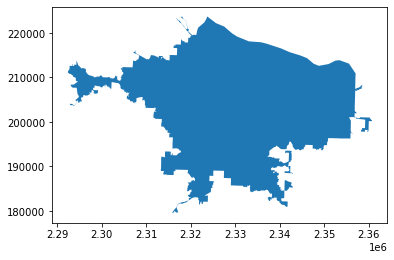

In [30]:
region = "Portland"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

<AxesSubplot:>

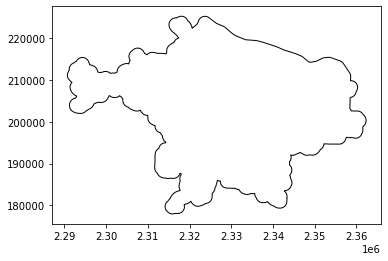

In [31]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

<AxesSubplot:>

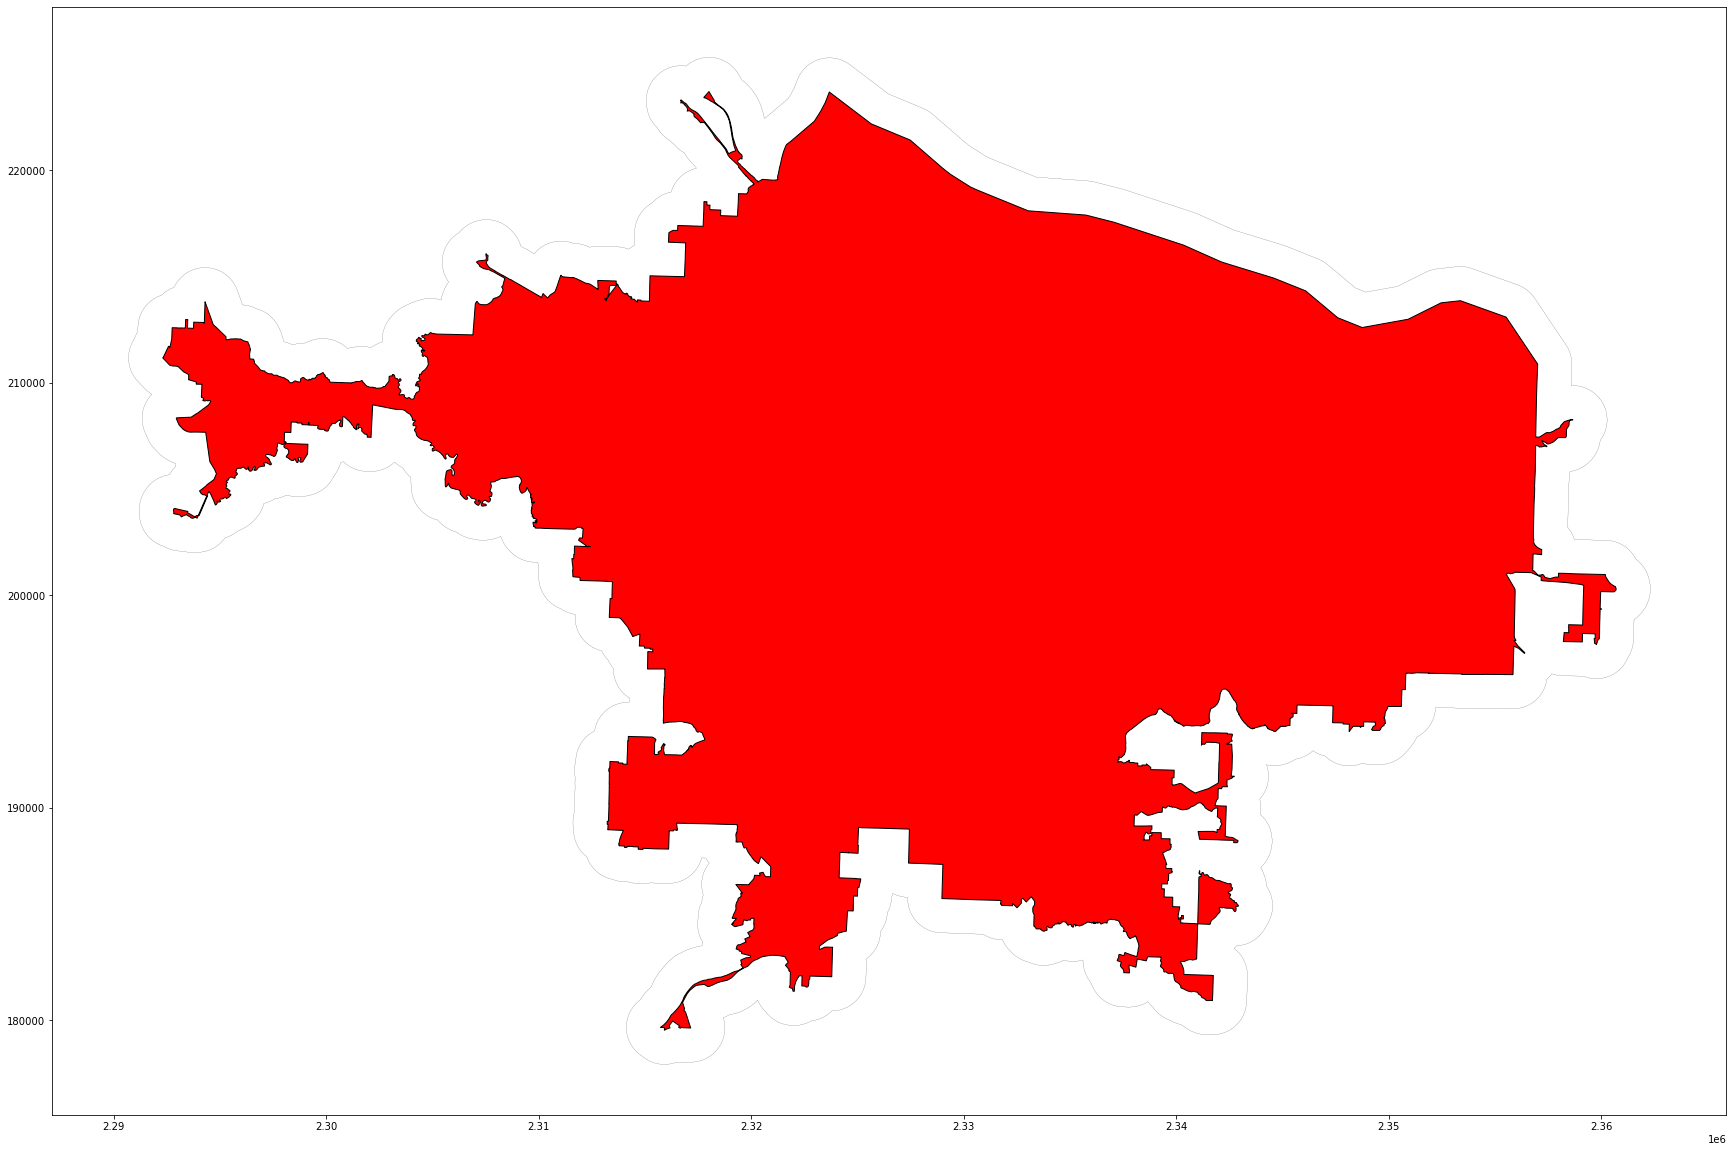

In [32]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

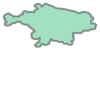

In [33]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

# Read the Eco and short term location file as gpd to get geometry

In [34]:
# df = gpd.GeoDataFrame(
# #     c1, geometry=gpd.points_from_xy(c1.longitude, c1.latitude))
# df.head()

In [35]:
# set the co-ordinate system first
# df = df.set_crs("EPSG:4211")

In [36]:
#print(df.crs)

In [37]:
# Let's take a copy of our layer
# gdf0_proj = df.copy()

# # Reproject the geometries by replacing the values with projected ones
# eco_proj = gdf0_proj.to_crs(epsg=2838)
# eco_proj.head()

In [38]:
# We can now plot our ``GeoDataFrame``.
#eco_proj.plot(eco_proj, color='red',figsize=(10,10))
#plt.show()

In [39]:
#ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
# ecoshort0.head()

In [40]:
#ecoshort0.reset_index(inplace=True)

In [41]:
#ecoshort0[ecoshort0.index.duplicated()]

# Filter the location by Extended Study area Boundary

In [42]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(stravalc, pba)
ecoshort.head()

OSM_ID        ID    aadb_s  aadb_s_com  \
61181  196381721.0  520768.0  0.136986    0.013699   
84606  589536534.0  804021.0  0.109589    0.000000   
61180  196381721.0  520767.0  0.095890    0.000000   
27038   45481307.0  365522.0  0.657534    0.178082   
61179  196381721.0  520766.0  0.109589    0.013699   

                             geometry  
61181  POINT (2351331.390 205207.818)  
84606  POINT (2350970.670 205208.273)  
61180  POINT (2351294.714 205208.998)  
27038  POINT (2350498.074 205209.074)  
61179  POINT (2351265.818 205209.929)

In [43]:
count_station=ecoshort.copy()

In [44]:
ecoshort.columns = ['osm_id_sensor','ID', 'aadb_s','aadb_s_com','geometry']

In [45]:
ecoshort=ecoshort.drop_duplicates(subset='ID')
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  
61181  POINT (2351331.390 205207.818)  
84606  POINT (2350970.670 205208.273)  
61180  POINT (2351294.714 205208.998)  
27038  POINT (2350498.074 205209.074)  
61179  POINT (2351265.818 205209.929)

<AxesSubplot:>

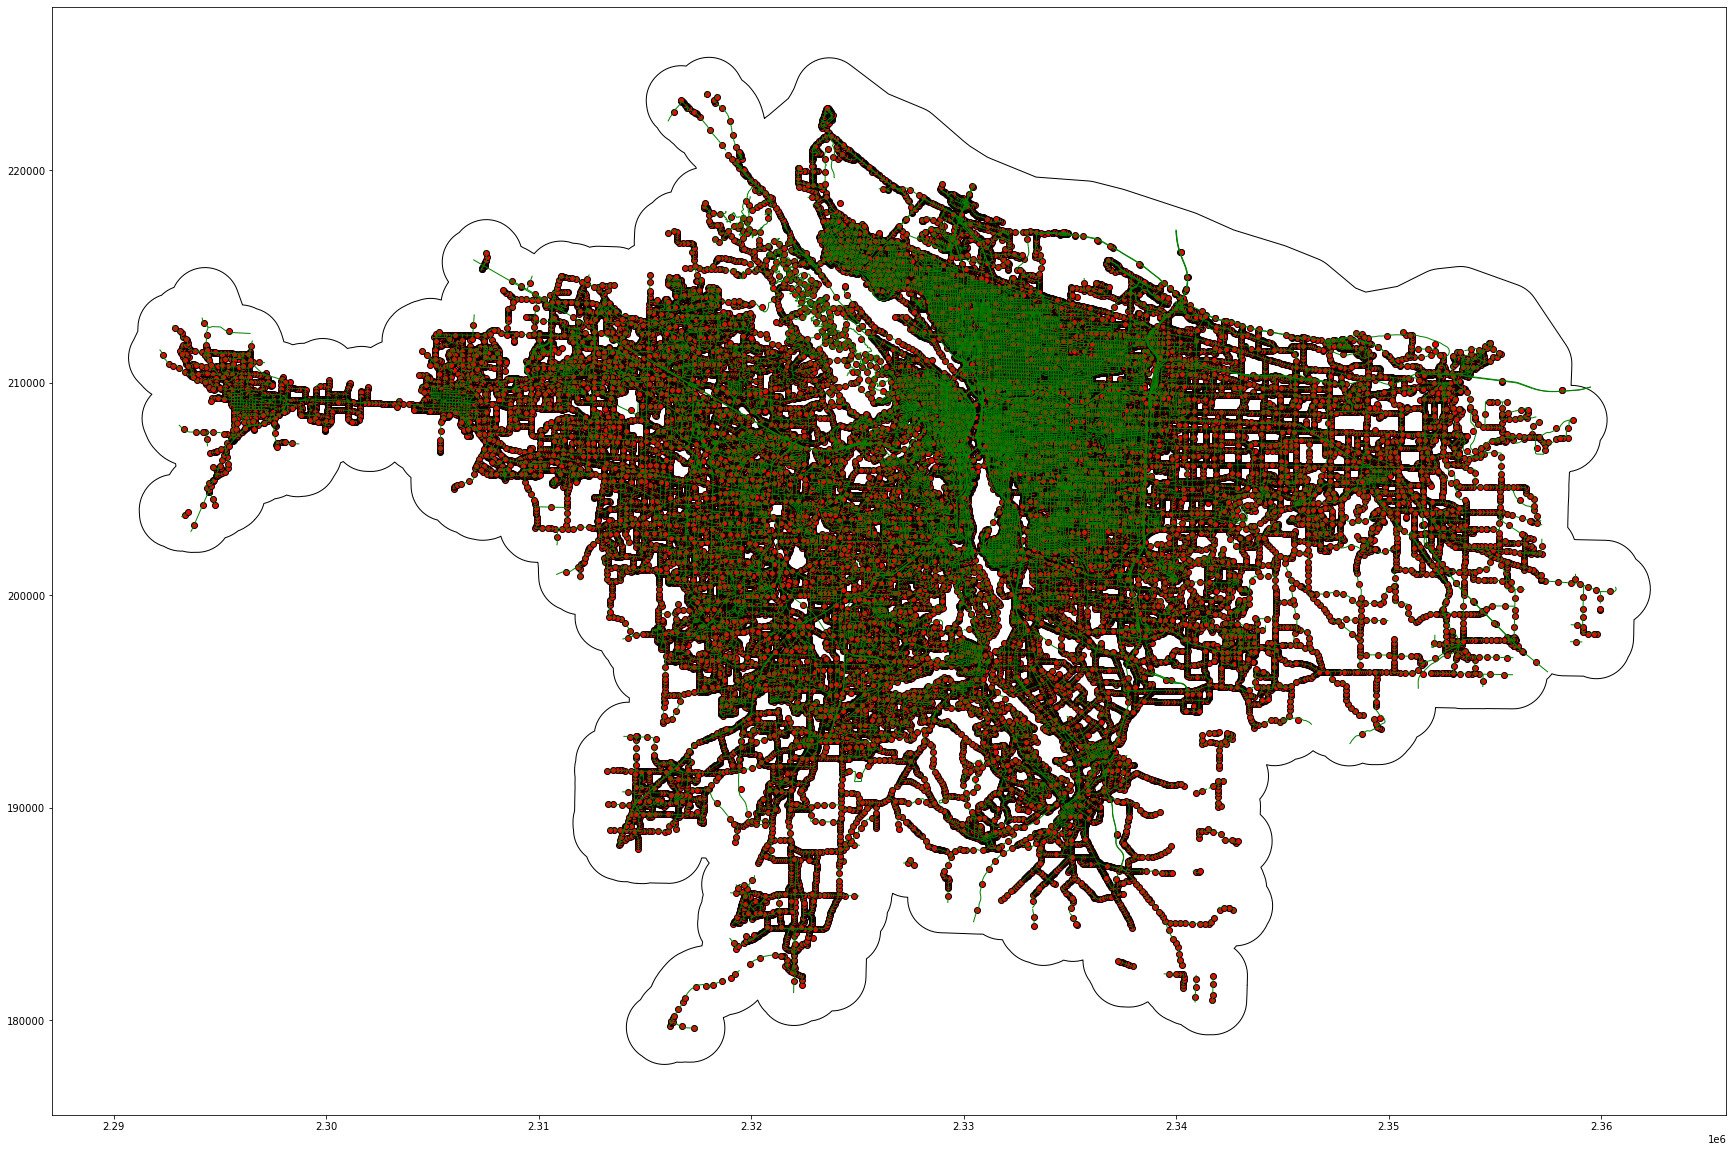

In [46]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
strava_proj1.plot(color="green",linewidth = 1.0,ax=ax)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [47]:
# Buffer file
#gdf1=nf3


In [48]:
gdf1 = ecoshort.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                                                geometry  
61181  POLYGON ((2351492.324 205207.818, 2351491.549 ...  
84606  POLYGON ((2351131.604 205208.273, 2351130.829 ...  
61180  POLYGON ((2351455.648 205208.998, 2351454.873 ...  
27038  POLYGON ((2350659.008 205209.074, 2350658.233 ...  
61179  POLYGON ((2351426.752 205209.929, 2351425.977 ...

In [49]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [50]:
import contextily as ctx

In [51]:
print(gdf1.crs)

epsg:2838


In [52]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2838 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2838") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

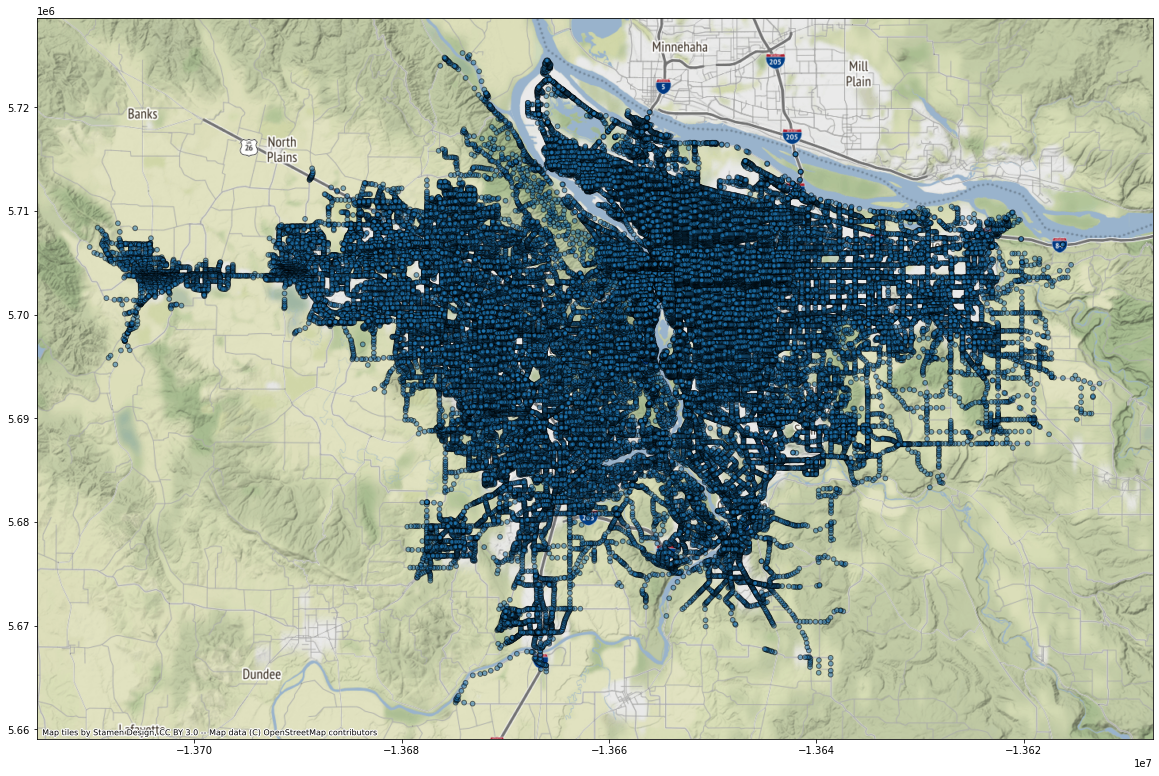

In [53]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

In [54]:
#bs_all.head(5)

# BS Origin

In [55]:
# Origin
# bso = gpd.GeoDataFrame(
#     bs_all, geometry=gpd.points_from_xy(bs_all.StartLongitude, bs_all.StartLatitude))
# bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
#bso.head(5)

In [56]:
# set the co-ordinate system first
# bso1 = bso.set_crs("EPSG:4211")

# # Reproject the geometries by replacing the values with projected ones
# bso1_proj = bso1.to_crs(epsg=2838)
# bso1_proj.head(5)

In [57]:
# Clip the data using GeoPandas clip
#bso1_clip = gpd.clip(bso1_proj, gdf1)
#bso1_clip.head(5)

In [58]:
 #int_bso=gpd.overlay(gdf1, bso1_proj, how='intersection', make_valid=True, keep_geom_type=False)
 #int_bso.head(5)

In [59]:
#int_bso=gpd.sjoin(gdf1,bso1_proj, how="inner", op='intersects')

In [60]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [61]:
# output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
# output_origin.columns=["osm_id","Bike Share Origin"]
# output_origin.head()

# BS destination

In [62]:
# Destination
# bsd = gpd.GeoDataFrame(
#     bs_all, geometry=gpd.points_from_xy(bs_all.EndLongitude, bs_all.EndLatitude))
# bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
# bsd.head(5)

In [63]:
# set the co-ordinate system first
# bsd1 = bsd.set_crs("EPSG:4211")
# # Reproject the geometries by replacing the values with projected ones
# bsd1_proj = bsd1.to_crs(epsg=2838)
# bsd1_proj.head(5)

In [64]:
# Clip the data using GeoPandas clip
#bsd1_clip = gpd.clip(bsd1_proj, gdf1)
#bsd1_clip.head(5)

In [65]:
#int_bsd=gpd.overlay(gdf1, bsd1_proj, how='intersection', make_valid=True, keep_geom_type=False)
#int_bsd.head(5)

In [66]:
#int_bsd=gpd.sjoin(gdf1,bsd1_proj, how="inner", op='intersects')

In [67]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [68]:
# output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
# output_destination.columns=["osm_id","Bike Share Destination"]
# output_destination.head()

# Bike Share OD line Crossing

In [69]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
# import shapely.geometry as geom
# bs_all_od=bs_all.copy()
# bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
# bs_all_od.head(5)

In [70]:
# exclude the points outside of Portland
# bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
# bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
# bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
# bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
# bs_all_od1.head(5)

In [71]:
#bs_all_od1.dtypes

In [72]:
#print(bs_all_od1.info())

In [73]:
# bs_all_od2 = gpd.GeoDataFrame(bs_all_od1, geometry='geometry', crs={'init': 'epsg:4211'})
# bs_all_od2.head(5)

In [74]:
# print(bs_all_od2.crs)

In [75]:
#print(bs_all_od2.info())

In [76]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
# bs_all_od2_proj = bs_all_od2.to_crs(epsg=2838)
# bs_all_od2_proj.head(5)

In [77]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [78]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [79]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [80]:
#int_odl=gpd.overlay(gdf1, odc1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [81]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [82]:
# output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
# output_odl.columns=["osm_id","Bike Share Crossing"]
# output_odl.head()

# Now import land use shape file

In [83]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id                       name         type  \
0  23625119                Lady Island   industrial   
1  24000302                       None        grass   
2  25822078  Intel Ronler Acres Campus   industrial   
3  25822108                       None   industrial   
4  25822220               Dawson Creek  residential   

                                            geometry  
0  POLYGON ((-122.44367 45.57471, -122.43671 45.5...  
1  POLYGON ((-122.85178 45.50665, -122.85060 45.5...  
2  POLYGON ((-122.92614 45.55060, -122.92613 45.5...  
3  POLYGON ((-122.90597 45.54689, -122.90572 45.5...  
4  POLYGON ((-122.92635 45.53824, -122.92930 45.5...

# Define and then Convert the co-ordinate system

In [84]:
# set the co-ordinate system first
lusec = luse.set_crs("EPSG:4326")

In [85]:
# # Let's take a copy of our layer
luse_proj = lusec.copy()

# # Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2838)
luse_proj.head(5)

osm_id                       name         type  \
0  23625119                Lady Island   industrial   
1  24000302                       None        grass   
2  25822078  Intel Ronler Acres Campus   industrial   
3  25822108                       None   industrial   
4  25822220               Dawson Creek  residential   

                                            geometry  
0  POLYGON ((2348315.732 213851.353, 2348848.428 ...  
1  POLYGON ((2316254.380 207136.871, 2316346.627 ...  
2  POLYGON ((2310592.897 212191.562, 2310593.718 ...  
3  POLYGON ((2312154.540 211731.603, 2312173.766 ...  
4  POLYGON ((2310534.979 210818.533, 2310304.726 ...

# Visualize

In [86]:
# fig, ax = plt.subplots(figsize = (30,25)) 
# gdf1.plot(ax=ax,color="red")
# luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [87]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

In [88]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [89]:
#luse_proj.exterior.type

In [90]:
#gdf1.exterior.type

In [91]:
#luse_proj.exterior.is_valid

In [92]:
#gdf1.exterior.is_valid

In [93]:
# # Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# # Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id                       name         type  \
0  23625119                Lady Island   industrial   
1  24000302                       None        grass   
2  25822078  Intel Ronler Acres Campus   industrial   
3  25822108                       None   industrial   
4  25822220               Dawson Creek  residential   

                                            geometry  
0  POLYGON ((2348315.732 213851.353, 2348392.904 ...  
1  POLYGON ((2316254.380 207136.871, 2316258.462 ...  
2  POLYGON ((2310592.897 212191.562, 2310593.718 ...  
3  POLYGON ((2312154.540 211731.603, 2312173.766 ...  
4  POLYGON ((2310534.979 210818.533, 2310304.726 ...

In [94]:
# # Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

osm_id               name        type  \
1520  284919691               None       grass   
1518  284919334               None       grass   
1519  284919690               None       grass   
6660  753722803               None       grass   
3648  492177837  Atlantic Aviation  commercial   

                                               geometry  
1520  POLYGON ((2337463.518 215053.536, 2337479.843 ...  
1518  MULTIPOLYGON (((2336922.026 215159.997, 233692...  
1519  POLYGON ((2337090.627 215180.049, 2337090.434 ...  
6660  POLYGON ((2337991.493 215073.216, 2337983.509 ...  
3648  POLYGON ((2337785.706 215272.825, 2337833.747 ...

In [95]:
#ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [96]:
intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
intdata.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  name    type  \
0    589536534.0  804021.0  0.109589    0.000000  480332319  None  retail   
1    196381721.0  520766.0  0.109589    0.013699  480332319  None  retail   
2    196381721.0  520765.0  0.123288    0.013699  480332319  None  retail   
3    196381721.0  520764.0  0.123288    0.013699  480332319  None  retail   
4      5535549.0  338410.0  0.438356    0.287671  480332319  None  retail   

                                            geometry  
0  POLYGON ((2351112.602 205132.409, 2351104.482 ...  
1  POLYGON ((2351141.415 205107.834, 2351132.007 ...  
2  POLYGON ((2351171.337 205057.456, 2351156.467 ...  
3  POLYGON ((2351153.279 205052.598, 2351137.505 ...  
4  POLYGON ((2350922.825 205124.907, 2350913.417 ...

In [97]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  name    type  \
0    589536534.0  804021.0  0.109589    0.000000  480332319  None  retail   
1    196381721.0  520766.0  0.109589    0.013699  480332319  None  retail   
2    196381721.0  520765.0  0.123288    0.013699  480332319  None  retail   
3    196381721.0  520764.0  0.123288    0.013699  480332319  None  retail   
4      5535549.0  338410.0  0.438356    0.287671  480332319  None  retail   

                                            geometry           Area  
0  POLYGON ((2351112.602 205132.409, 2351104.482 ...  223690.361484  
1  POLYGON ((2351141.415 205107.834, 2351132.007 ...    1682.875377  
2  POLYGON ((2351171.337 205057.456, 2351156.467 ...   38448.930618  
3  POLYGON ((2351153.279 205052.598, 2351137.505 ...  129746.146314  
4  POLYGON ((2350922.825 205124.907, 2350913.417 ...    3964.636542

#https://geopandas.org/docs/user_guide/set_operations.html

In [98]:
#intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [99]:
output_landuse=intdata.groupby(by=['ID','type'])['Area'].sum().reset_index()
output_landuse.columns=['ID','type','Area']
output_landuse.head()

ID         type           Area
0   8.0  residential  122130.549472
1   8.0       retail  486698.851366
2  10.0  residential  750573.869132
3  26.0  residential  603025.786735
4  30.0  residential  349306.635077

In [100]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['ID'])['Area'].sum().reset_index()
output_commercial.columns=['ID','Commercial Area ']
output_commercial.head()

ID  Commercial Area 
0  34.0     181311.193917
1  35.0     149039.723331
2  36.0     162075.736504
3  37.0     166351.984880
4  40.0     156905.251018

In [101]:
#gdf1.head()

In [102]:
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [103]:
# # Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['ID'])['Area'].sum().reset_index()
output_industrial.columns=['ID','Industrial Area ']
output_industrial.head()

ID  Industrial Area 
0  34.0     107831.123055
1  35.0     255726.095800
2  36.0     362820.239300
3  37.0     450756.895820
4  40.0     543481.828642

In [104]:
# # Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['ID'])['Area'].sum().reset_index()
output_residential.columns=['ID','Residential_Area ']
output_residential.head()

ID  Residential_Area 
0   8.0      122130.549472
1  10.0      750573.869132
2  26.0      603025.786735
3  30.0      349306.635077
4  31.0      399953.547081

In [105]:
#residential.head(5)

In [106]:
#plotting    
#ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
#residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [107]:
# # Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['ID'])['Area'].sum().reset_index()
output_retail.columns=['ID','Retail Area']
output_retail.head()

ID    Retail Area
0   8.0  486698.851366
1  35.0  315614.098864
2  36.0  196217.215299
3  37.0  110307.893835
4  40.0     319.042666

In [108]:
# # Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['ID'])['Area'].sum().reset_index()
output_grass.columns=['ID','Grass Area']
output_grass.head()

ID    Grass Area
0     35.0   7128.581842
1     36.0   7813.257494
2     37.0   7405.256648
3     40.0   7405.256648
4  74871.0  29237.502312

In [109]:
#output_grass.index

# Use the Natural Shape file to calculate the Park, water and green spaces

In [110]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  
0  POLYGON ((-122.56649 45.56608, -122.56653 45.5...  
1  POLYGON ((-122.59824 45.57255, -122.59823 45.5...  
2  POLYGON ((-122.61278 45.57436, -122.61274 45.5...  
3  POLYGON ((-122.58331 45.56990, -122.58320 45.5...  
4  POLYGON ((-122.54781 45.56336, -122.54810 45.5...

In [111]:
# set the co-ordinate system first
nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2838)
nature_proj.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [112]:
#nature_proj.plot()

<AxesSubplot:>

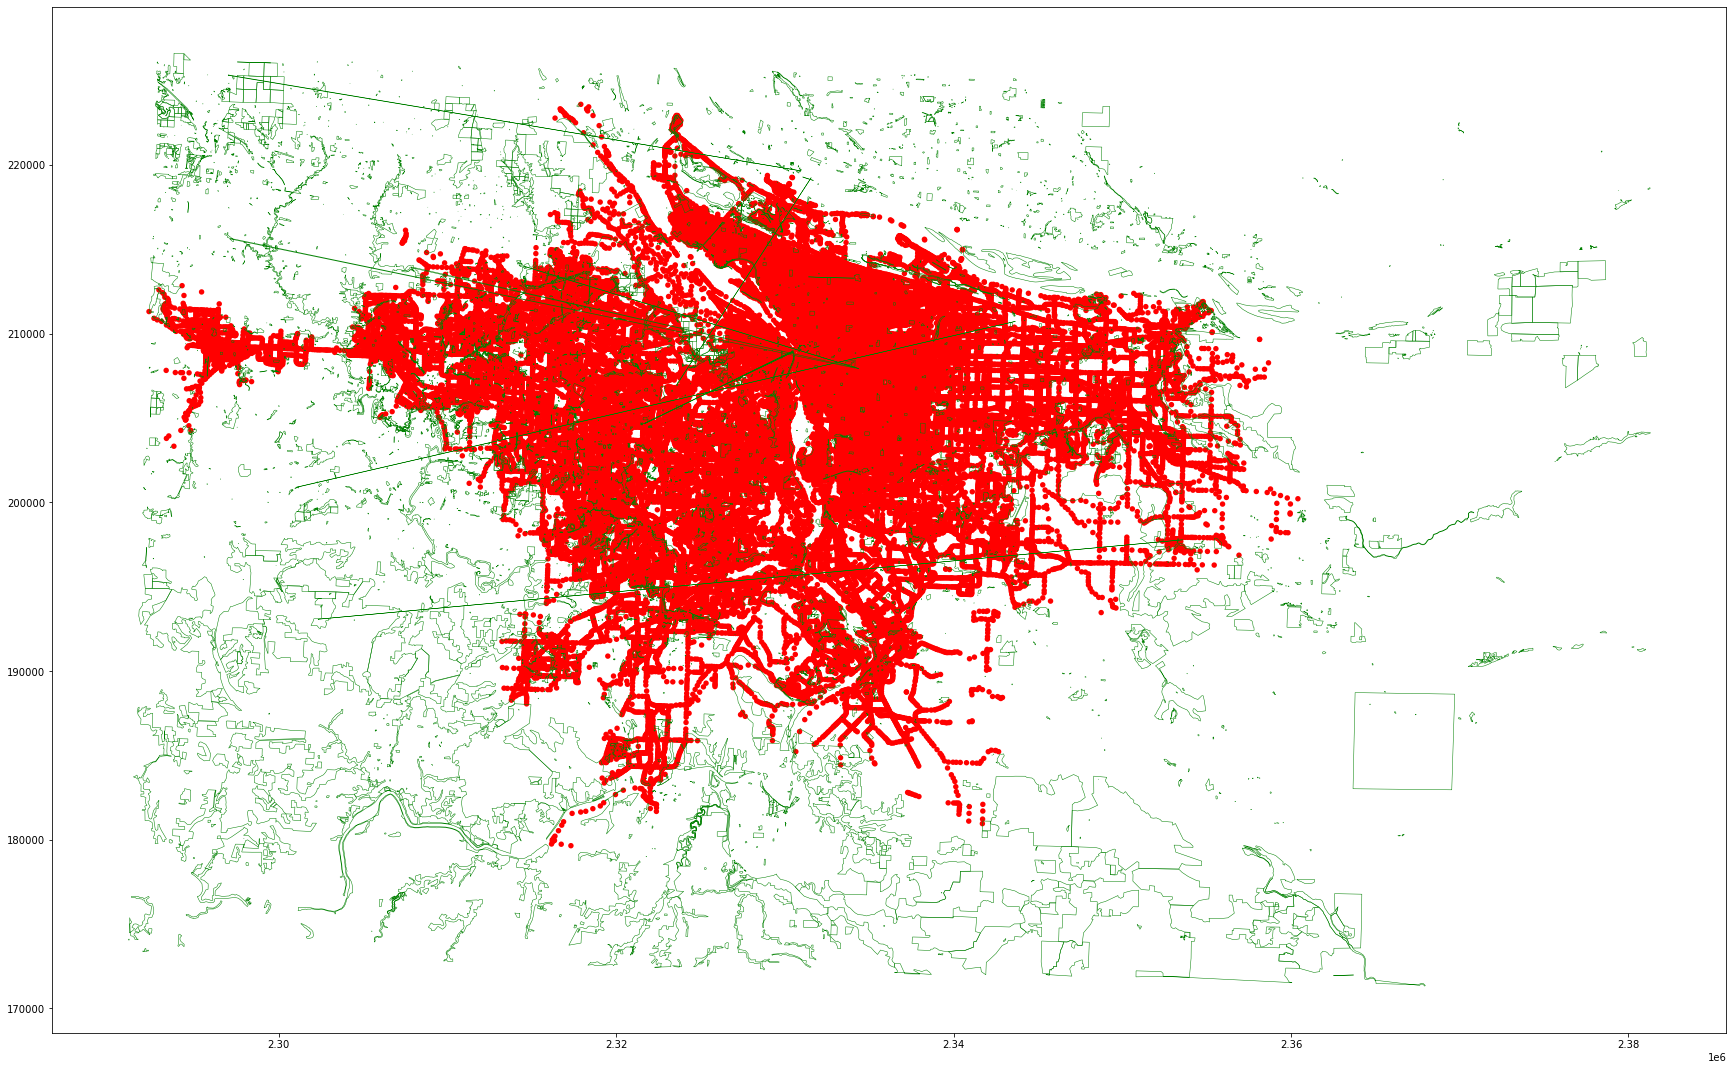

In [113]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [114]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  \
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...   
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...   
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...   
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...   
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...   

                                           geometry2  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [115]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                           geometry2  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [116]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [117]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

osm_id          name    type  \
309    68712552          None   water   
2934  379305068          None   water   
2926  379305058          None   water   
5580  810528644          None  forest   
5581  810528645          None  forest   
1566  142824679  Chimney Park    park   
3710  446027236          None  forest   
842   119709395    Smith Lake   water   
4525  533494752          None  forest   
2938  379305074          None   water   

                                               geometry  
309   MULTIPOLYGON (((2318169.106 221781.817, 231816...  
2934  POLYGON ((2327947.800 217547.837, 2327935.084 ...  
2926  POLYGON ((2328012.469 217611.821, 2328017.383 ...  
5580  POLYGON ((2328003.663 217821.785, 2327980.964 ...  
5581  POLYGON ((2327873.227 218177.054, 2327864.792 ...  
1566  POLYGON ((2323814.013 217924.045, 2323804.761 ...  
3710  POLYGON ((2323793.312 218239.082, 2323789.809 ...  
842   MULTIPOLYGON (((2326125.711 219119.894, 232614...  
4525  POLYGON ((2327920.674 218878.985, 2327965.848 ...  
2938  MULTIPOLYGON (((2323293.205 218997.724, 232329...

In [118]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head()

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id            name  \
0    196360799.0  520676.0  0.041096    0.000000  142413002  Main City Park   
1    127464325.0  435045.0  0.589041    0.260274  142413002  Main City Park   
2    542826886.0  789359.0  0.465753    0.109589  142413002  Main City Park   
3    127464325.0  435046.0  0.589041    0.232877  142413002  Main City Park   
4    127464325.0  435047.0  0.561644    0.246575  142413002  Main City Park   

   type                                           geometry  
0  park  POLYGON ((2349192.031 205199.220, 2349189.714 ...  
1  park  POLYGON ((2349014.519 205208.535, 2349012.202 ...  
2  park  POLYGON ((2348996.241 205214.437, 2348993.923 ...  
3  park  POLYGON ((2349064.955 205220.263, 2349062.638 ...  
4  park  POLYGON ((2349087.164 205212.408, 2349083.327 ...

In [119]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head()

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id            name  \
0    196360799.0  520676.0  0.041096    0.000000  142413002  Main City Park   
1    127464325.0  435045.0  0.589041    0.260274  142413002  Main City Park   
2    542826886.0  789359.0  0.465753    0.109589  142413002  Main City Park   
3    127464325.0  435046.0  0.589041    0.232877  142413002  Main City Park   
4    127464325.0  435047.0  0.561644    0.246575  142413002  Main City Park   

   type                                           geometry           Area  
0  park  POLYGON ((2349192.031 205199.220, 2349189.714 ...  452797.062396  
1  park  POLYGON ((2349014.519 205208.535, 2349012.202 ...   94080.917097  
2  park  POLYGON ((2348996.241 205214.437, 2348993.923 ...   58931.663877  
3  park  POLYGON ((2349064.955 205220.263, 2349062.638 ...  160042.097481  
4  park  POLYGON ((2349087.164 205212.408, 2349083.327 ...  184222.606166

In [120]:
#inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [121]:
output_nature=inter_nature.groupby(by=['ID','type'])['Area'].sum().reset_index()
output_nature.head()

ID    type           Area
0  10.0  forest  127446.689096
1  10.0    park  123598.181303
2  18.0  forest   38739.065516
3  20.0  forest   66682.466525
4  20.0   water   48933.814872

In [122]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['ID'])['Area'].sum().reset_index()
output_park.columns=['ID',"Park Area"]
output_park.head()

ID      Park Area
0  10.0  123598.181303
1  30.0  302425.674157
2  31.0  292416.725448
3  51.0  370816.081991
4  52.0   32808.293650

In [123]:
# # Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['ID'])['Area'].sum().reset_index()
output_water.columns=['ID',"Water Area"]
output_water.head()

ID    Water Area
0     20.0  48933.814872
1     35.0    879.501257
2     56.0   1820.027431
3  73238.0    104.097052
4  73239.0    167.106440

In [124]:
# # Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['ID'])['Area'].sum().reset_index()
output_forest.columns=['ID',"Forest Area"]
output_forest.head()

ID    Forest Area
0  10.0  127446.689096
1  18.0   38739.065516
2  20.0   66682.466525
3  34.0  289527.450105
4  35.0    1216.008322

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [125]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head()

osm_id timestamp  name             type                     geometry
0  27195852      None  None  traffic_signals  POINT (-122.86756 45.54089)
1  27199958      None  None   turning_circle  POINT (-122.88963 45.53199)
2  27266177      None  None  traffic_signals  POINT (-122.90523 45.53771)
3  27266267      None  None  traffic_signals  POINT (-122.88852 45.53605)
4  27273304      None  None  traffic_signals  POINT (-122.86309 45.53985)

In [126]:
# # set the co-ordinate system first
pts = pts.set_crs("EPSG:4326")
# # Let's take a copy of our layer
pts_proj = pts.copy()

# # Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2838)
pts_proj.head()

osm_id timestamp  name             type                        geometry
0  27195852      None  None  traffic_signals  POINT (2315133.607 210977.179)
1  27199958      None  None   turning_circle  POINT (2313381.281 210038.384)
2  27266177      None  None  traffic_signals  POINT (2312182.520 210710.249)
3  27266267      None  None  traffic_signals  POINT (2313480.859 210487.402)
4  27273304      None  None  traffic_signals  POINT (2315478.452 210851.497)

In [127]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [128]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head()

osm_id timestamp  name            type  \
12693   333801364      None  None  level_crossing   
12690   333801276      None  None  level_crossing   
17357  1194845034      None  None  level_crossing   
17353  1194845022      None  None  level_crossing   
17351  1194845015      None  None  level_crossing   

                             geometry  
12693  POINT (2338268.058 214774.723)  
12690  POINT (2338270.251 214778.346)  
17357  POINT (2338258.440 214780.206)  
17353  POINT (2338260.541 214783.898)  
17351  POINT (2338251.092 214784.385)

In [129]:
#ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [130]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com      osm_id timestamp  name  \
0    196381721.0  520768.0  0.136986    0.013699  1421289420      None  None   
1    196381721.0  520767.0  0.095890    0.000000  1421289420      None  None   
2    196381721.0  520766.0  0.109589    0.013699  1421289420      None  None   
3    196381721.0  520765.0  0.123288    0.013699  1421289420      None  None   
4    196381720.0  520762.0  0.136986    0.013699  1421289420      None  None   

             type                        geometry  
0  turning_circle  POINT (2351368.784 205155.741)  
1  turning_circle  POINT (2351368.784 205155.741)  
2  turning_circle  POINT (2351368.784 205155.741)  
3  turning_circle  POINT (2351368.784 205155.741)  
4  turning_circle  POINT (2351368.784 205155.741)

# Calculate the bicycle parking

In [131]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com      osm_id timestamp  \
12664    381902378.0  688754.0  2.917808    1.191781  1343846359      None   
12665    381902379.0  688755.0  2.671233    1.205479  1343846359      None   
12666    133801022.0  446375.0  0.013699    0.000000  1343846359      None   
12667    418554941.0  709385.0  3.013699    1.205479  1343846359      None   
12668    607161224.0  811742.0  2.452055    1.095890  1343846359      None   

       name             type                        geometry  
12664  None  bicycle_parking  POINT (2340055.019 198115.060)  
12665  None  bicycle_parking  POINT (2340055.019 198115.060)  
12666  None  bicycle_parking  POINT (2340055.019 198115.060)  
12667  None  bicycle_parking  POINT (2340055.019 198115.060)  
12668  None  bicycle_parking  POINT (2340055.019 198115.060)

In [132]:
output_bparking=b_parking.groupby(by=['ID'])['type'].count().reset_index()
output_bparking.columns=["ID","Bicycle Parking"]
output_bparking.head()

ID  Bicycle Parking
0      8.0                1
1     26.0                1
2     56.0                7
3  74315.0                1
4  74316.0                1

# Calculate bus stops

In [133]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com      osm_id timestamp  \
105    589536534.0  804021.0  0.109589    0.000000 -1161645999      None   
106    589536538.0  804022.0  0.150685    0.013699 -1161645999      None   
107    196381721.0  520763.0  0.150685    0.013699 -1161645999      None   
108    130809238.0  442979.0  0.054795    0.000000 -1161645999      None   
109    130809238.0  442981.0  0.082192    0.000000 -1161645999      None   

                    name      type                        geometry  
105  Southeast 3rd & 1st  bus_stop  POINT (2350975.211 205175.281)  
106  Southeast 3rd & 1st  bus_stop  POINT (2350975.211 205175.281)  
107  Southeast 3rd & 1st  bus_stop  POINT (2350975.211 205175.281)  
108  Southeast 3rd & 1st  bus_stop  POINT (2350975.211 205175.281)  
109  Southeast 3rd & 1st  bus_stop  POINT (2350975.211 205175.281)

In [134]:
output_bstop=transit_stops.groupby(by=['ID'])['type'].count().reset_index()
output_bstop.columns=["ID","Bus Stops"]
output_bstop.head()

ID  Bus Stops
0   8.0          2
1  18.0          1
2  20.0          2
3  53.0          2
4  56.0          1

# Calculate school/college/university

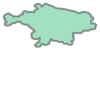

In [135]:
polygon = pba.to_crs(4326).iloc[0]
polygon

In [136]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)



C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [137]:
#scl.head(5)

In [138]:
#print(scl.crs)

In [139]:
# # set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# # Let's take a copy of our layer
scl_proj = scl.copy()

# # Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2838)
scl_proj.head(5)

geometry wheelchair  addr:city  \
element_type osmid                                                             
node         251851260  POINT (2317192.851 203560.279)        NaN  Beaverton   
             251851266  POINT (2315063.403 204701.392)        NaN      Aloha   
             251851273  POINT (2313848.119 203248.398)        NaN      Aloha   
             251851274  POINT (2319838.086 203960.126)        NaN  Beaverton   
             251851275  POINT (2318993.672 207118.918)        NaN  Beaverton   

                       addr:housenumber addr:postcode  \
element_type osmid                                      
node         251851260            15760         97007   
             251851266            18380         97078   
             251851273             6750         97078   
             251851274             5650         97005   
             251851275            13755         97005   

                                     addr:street amenity  \
element_type osmid                                         
node         251851260      Southwest Davis Road  school   
             251851266   Southwest Kinnaman Road  school   
             251851273    Southwest 198th Avenue  school   
             251851274  Southwest Hall Boulevard  school   
             251851275     Southwest Walker Road  school   

                                                name addr:state denomination  \
element_type osmid                                                             
node         251851260                Educare School        NaN          NaN   
             251851266        Agape Christian School        NaN          NaN   
             251851273      Palace of Praise Academy        NaN          NaN   
             251851274       Pilgrim Lutheran School         OR     lutheran   
             251851275  Holy Trinity Catholic School         OR     catholic   

                        ... female landuse roof:levels proposed:name  \
element_type osmid      ...                                            
node         251851260  ...    NaN     NaN         NaN           NaN   
             251851266  ...    NaN     NaN         NaN           NaN   
             251851273  ...    NaN     NaN         NaN           NaN   
             251851274  ...    NaN     NaN         NaN           NaN   
             251851275  ...    NaN     NaN         NaN           NaN   

                       source_ref wikimedia_commons opening_date addr:county  \
element_type osmid                                                             
node         251851260        NaN               NaN          NaN         NaN   
             251851266        NaN               NaN          NaN         NaN   
             251851273        NaN               NaN          NaN         NaN   
             251851274        NaN               NaN          NaN         NaN   
             251851275        NaN               NaN          NaN         NaN   

                       ways type  
element_type osmid                
node         251851260  NaN  NaN  
             251851266  NaN  NaN  
             251851273  NaN  NaN  
             251851274  NaN  NaN  
             251851275  NaN  NaN  

[5 rows x 74 columns]

In [140]:
school= inter_pts[inter_pts['type'].str.contains('school')]
school.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id timestamp  \
4540    169169229.0  493204.0  1.369863    0.575342  357363600      None   
4541      5523685.0  328341.0  0.095890    0.000000  357363600      None   
4542    425631810.0  720756.0  0.041096    0.000000  357363600      None   
4543    169169229.0  493203.0  1.561644    0.726027  357363600      None   
4544    589306250.0  803609.0  0.438356    0.136986  357363600      None   

                                     name    type  \
4540  Highland Community Pre-Kindergarten  school   
4541  Highland Community Pre-Kindergarten  school   
4542  Highland Community Pre-Kindergarten  school   
4543  Highland Community Pre-Kindergarten  school   
4544  Highland Community Pre-Kindergarten  school   

                            geometry  
4540  POINT (2345643.184 204747.679)  
4541  POINT (2345643.184 204747.679)  
4542  POINT (2345643.184 204747.679)  
4543  POINT (2345643.184 204747.679)  
4544  POINT (2345643.184 204747.679)

In [141]:
scl_proj['geometry']=scl_proj['geometry'].centroid
scl_proj.head()

geometry wheelchair  addr:city  \
element_type osmid                                                             
node         251851260  POINT (2317192.851 203560.279)        NaN  Beaverton   
             251851266  POINT (2315063.403 204701.392)        NaN      Aloha   
             251851273  POINT (2313848.119 203248.398)        NaN      Aloha   
             251851274  POINT (2319838.086 203960.126)        NaN  Beaverton   
             251851275  POINT (2318993.672 207118.918)        NaN  Beaverton   

                       addr:housenumber addr:postcode  \
element_type osmid                                      
node         251851260            15760         97007   
             251851266            18380         97078   
             251851273             6750         97078   
             251851274             5650         97005   
             251851275            13755         97005   

                                     addr:street amenity  \
element_type osmid                                         
node         251851260      Southwest Davis Road  school   
             251851266   Southwest Kinnaman Road  school   
             251851273    Southwest 198th Avenue  school   
             251851274  Southwest Hall Boulevard  school   
             251851275     Southwest Walker Road  school   

                                                name addr:state denomination  \
element_type osmid                                                             
node         251851260                Educare School        NaN          NaN   
             251851266        Agape Christian School        NaN          NaN   
             251851273      Palace of Praise Academy        NaN          NaN   
             251851274       Pilgrim Lutheran School         OR     lutheran   
             251851275  Holy Trinity Catholic School         OR     catholic   

                        ... female landuse roof:levels proposed:name  \
element_type osmid      ...                                            
node         251851260  ...    NaN     NaN         NaN           NaN   
             251851266  ...    NaN     NaN         NaN           NaN   
             251851273  ...    NaN     NaN         NaN           NaN   
             251851274  ...    NaN     NaN         NaN           NaN   
             251851275  ...    NaN     NaN         NaN           NaN   

                       source_ref wikimedia_commons opening_date addr:county  \
element_type osmid                                                             
node         251851260        NaN               NaN          NaN         NaN   
             251851266        NaN               NaN          NaN         NaN   
             251851273        NaN               NaN          NaN         NaN   
             251851274        NaN               NaN          NaN         NaN   
             251851275        NaN               NaN          NaN         NaN   

                       ways type  
element_type osmid                
node         251851260  NaN  NaN  
             251851266  NaN  NaN  
             251851273  NaN  NaN  
             251851274  NaN  NaN  
             251851275  NaN  NaN  

[5 rows x 74 columns]

In [142]:
buffer_clip_scl = gpd.clip(scl_proj, gdf1)

In [143]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head()

osm_id_sensor        ID     aadb_s  aadb_s_com wheelchair addr:city  \
0    127464325.0  435045.0   0.589041    0.260274        NaN   Gresham   
1    542826886.0  789359.0   0.465753    0.109589        NaN   Gresham   
2    664563729.0  836342.0  26.684932    6.424658        NaN   Gresham   
3    193594838.0  518775.0   0.671233    0.219178        NaN   Gresham   
4    193594838.0  518773.0   0.643836    0.205479        NaN   Gresham   

  addr:housenumber addr:postcode            addr:street amenity  ... landuse  \
0              330         97030  West Powell Boulevard  school  ...     NaN   
1              330         97030  West Powell Boulevard  school  ...     NaN   
2              330         97030  West Powell Boulevard  school  ...     NaN   
3              330         97030  West Powell Boulevard  school  ...     NaN   
4              330         97030  West Powell Boulevard  school  ...     NaN   

  roof:levels proposed:name source_ref wikimedia_commons opening_date  \
0         NaN           NaN        NaN               NaN          NaN   
1         NaN           NaN        NaN               NaN          NaN   
2         NaN           NaN        NaN               NaN          NaN   
3         NaN           NaN        NaN               NaN          NaN   
4         NaN           NaN        NaN               NaN          NaN   

  addr:county ways type                        geometry  
0         NaN  NaN  NaN  POINT (2348719.807 205143.050)  
1         NaN  NaN  NaN  POINT (2348719.807 205143.050)  
2         NaN  NaN  NaN  POINT (2348719.807 205143.050)  
3         NaN  NaN  NaN  POINT (2348719.807 205143.050)  
4         NaN  NaN  NaN  POINT (2348719.807 205143.050)  

[5 rows x 78 columns]

In [144]:
output_school=inter_scl.groupby(by=['ID'])['geometry'].count().reset_index()
output_school.columns=["ID","School"]
output_school.head()

ID  School
0  74315.0       1
1  74878.0       3
2  76755.0       1
3  77921.0       1
4  77923.0       1

# Closest distance to school

In [145]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

In [146]:
school1= pts_proj[pts_proj['type'].str.contains('school')]
school1.head(5)

osm_id timestamp                          name    type  \
11948  251851260      None                Educare School  school   
11949  251851266      None        Agape Christian School  school   
11950  251851270      None  Faith Bible Christian School  school   
11951  251851273      None      Palace of Praise Academy  school   
11952  251851274      None       Pilgrim Lutheran School  school   

                             geometry  
11948  POINT (2317192.851 203560.279)  
11949  POINT (2315063.403 204701.392)  
11950  POINT (2316311.783 205228.919)  
11951  POINT (2313848.119 203248.398)  
11952  POINT (2319838.086 203960.126)

In [147]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["ID","min_dist_to_school"]]
output_school_distance.columns=["ID","min_dist_to_school"]
output_school_distance.head()

ID  min_dist_to_school
61181  520768.0         2313.723113
84606  804021.0         3270.932019
61180  520767.0         2404.346886
27038  365522.0         2151.072703
61179  520766.0         2477.533230

# Count College within the buffer

In [148]:
# # Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# # set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# # Let's take a copy of our layer
coll_proj = coll.copy()

# # Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2838)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [149]:
college= inter_pts[inter_pts['type'].str.contains('college')]
college.head()

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id timestamp  \
49588    589339487.0  803726.0  0.753425    0.520548  839684737      None   
49589    130908897.0  443046.0  0.726027    0.506849  839684737      None   
49590    197466324.0  522403.0  0.068493    0.068493  839684737      None   
49591    589339541.0  803798.0  0.068493    0.068493  839684737      None   
49592    402958232.0  699934.0  0.041096    0.041096  839684737      None   

                                         name     type  \
49588  Pacific Northwest Carpenters Institute  college   
49589  Pacific Northwest Carpenters Institute  college   
49590  Pacific Northwest Carpenters Institute  college   
49591  Pacific Northwest Carpenters Institute  college   
49592  Pacific Northwest Carpenters Institute  college   

                             geometry  
49588  POINT (2343965.130 211623.998)  
49589  POINT (2343965.130 211623.998)  
49590  POINT (2343965.130 211623.998)  
49591  POINT (2343965.130 211623.998)  
49592  POINT (2343965.130 211623.998)

In [150]:
output_college=inter_coll.groupby(by=['ID'])['geometry'].count().reset_index()
output_college.columns=["ID","college"]
output_college.head()

ID  college
0   78217.0        1
1   78218.0        1
2   88942.0        1
3   88943.0        1
4  164006.0        1

# Closest distance to college

In [151]:
college1= pts_proj[pts_proj['type'].str.contains('college')]
college1.head()

osm_id timestamp                                         name  \
13939   433482580      None                                 LDS seminary   
35794 -1001664116      None                               Le Cordon Bleu   
35994  -912882742      None  Portland Community College Hillsboro Center   
44155   -71089071      None       The Wellspring School for Healing Arts   
46335   240418911      None                               Sumner College   

          type                        geometry  
13939  college  POINT (2319614.291 204630.751)  
35794  college  POINT (2329629.833 208282.814)  
35994  college  POINT (2306426.667 208938.806)  
44155  college  POINT (2331255.433 210432.470)  
46335  college  POINT (2324105.788 196210.113)

In [152]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["ID","min_dist_to_college"]]
output_college_distance.columns=["ID","min_dist_to_college"]
output_college_distance.head()

ID  min_dist_to_college
61181  520768.0         32049.817932
84606  804021.0         31166.100816
61180  520767.0         31956.629933
27038  365522.0         30039.061287
61179  520766.0         31883.337831

# Count the University within buffer and turn it yes(1) and No(0) coding

In [153]:
university= inter_pts[inter_pts['type'].str.contains('university')]
#university.head()

In [154]:
# # Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# # set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# # Let's take a copy of our layer
uni_proj = uni.copy()

# # Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2838)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [155]:
output_university=inter_uni.groupby(by=['ID'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["ID","University"]
output_university.head()

ID  University
0   81214.0           1
1  165329.0           1
2  173179.0           1
3  176415.0           1
4  176416.0           1

# Closest distance to university

In [156]:
university1= pts_proj[pts_proj['type'].str.contains('university')]
university1.head()

osm_id timestamp                        name        type  \
13375   357328789      None  Lewis and Clark Law School  university   
39861  -514531266      None       Willamette University  university   
52960  2051358801      None          Pacific University  university   

                             geometry  
13375  POINT (2329697.793 200753.755)  
39861  POINT (2329462.126 209314.239)  
52960  POINT (2329489.738 209032.825)

In [157]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["ID","min_dist_to_university"]]
output_university_distance.columns=["ID","min_dist_to_university"]
output_university_distance.head()

ID  min_dist_to_university
61181  520768.0             6352.901927
84606  804021.0             6797.818660
61180  520767.0             6386.015557
27038  365522.0             7622.789529
61179  520766.0             6413.573717

# Calculate osm node density

In [158]:
# lets bring the road shape file node to calculate the osm node density

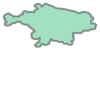

In [159]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [160]:
# #!pip install networkx
# #!pip install osmnx
# import networkx as nx
# import osmnx as ox
# ox.config(log_file=True,log_console=True,use_cache=True)
# #place="Portland,USA"
# #Construct the street network
# G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
# #G_projected=ox.project_graph(G)
# #fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [161]:
#nodes, edges = ox.graph_to_gdfs(G)
#nodes.head(5)

In [162]:
#print(nodes.crs)

In [163]:
# # set the co-ordinate system first
# node = nodes.set_crs("EPSG:4326")
# # Let's take a copy of our layer
# node_proj = node.copy()

# # Reproject the geometries by replacing the values with projected ones
# node_proj = node_proj.to_crs(epsg=2838)
# node_proj.head(5)

In [164]:
# Clip the data using GeoPandas clip
#buffer_clip_node = gpd.clip(node_proj, gdf1)
#buffer_clip_node.head(5)

In [165]:
#ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [166]:
#  inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
#  inter_node.head(5)

In [167]:
#output_intersection_density= inter_node.groupby(by=['ID'])['geometry'].count()/(3.1416*size*size*3.861e-07)
#output_intersection_density.head()

In [168]:
#output_intersection_density1=output_intersection_density.reset_index()
#output_intersection_density1.columns=["ID","OSM_node_Density"]
#output_intersection_density1.head()

# Calculate the Intersection Density

In [169]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

In [170]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2838)
nodea_proj.head(5)

y           x  street_count highway  \
osmid                                                   
27199858  45.530317 -122.891740             3     NaN   
27199860  45.529636 -122.889662             4     NaN   
27203602  45.529630 -122.889014             3     NaN   
27266260  45.537931 -122.900224             4     NaN   
27266264  45.537115 -122.894080             3     NaN   

                                geometry  
osmid                                     
27199858  POINT (2313210.935 209857.954)  
27199860  POINT (2313370.935 209777.459)  
27203602  POINT (2313421.525 209775.318)  
27266260  POINT (2312573.704 210723.395)  
27266264  POINT (2313050.640 210618.571)

In [171]:
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
outputa_intersection_density= inter_nodea.groupby(by=['ID'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_densitya=outputa_intersection_density.reset_index()
output_intersection_densitya.columns=["ID","Intersection_Density"]
output_intersection_densitya.head()

ID  Intersection_Density
0   8.0             95.493751
1  10.0             95.493751
2  18.0            222.818753
3  20.0            222.818753
4  26.0            190.987502

# Calculate the Number of Lanes

In [172]:
#edges.head(5)

In [173]:
#print(edges.crs)

In [174]:
# # set the co-ordinate system first
# edge = edges.set_crs("EPSG:4326")
# # Let's take a copy of our layer
# edge_proj = edge.copy()

# # Reproject the geometries by replacing the values with projected ones
# edge_proj = edge_proj.to_crs(epsg=2838)
# edge_proj.head(5)

In [175]:
# Consider rows without NAN
# edge_clean = edge_proj[edge_proj['lanes'].notna()]
# edge_clean2 = edge_clean [edge_clean.lanes!=0]
# edge_clean2.head(10)

In [176]:
%%time
# def nearest_linestring(point, df_lines):
#     idx = df_lines.geometry.distance(point).idxmin()
#     return df_lines.loc[idx, 'lanes']

# ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
# ecoshort
# ecoshort_lane=ecoshort.copy()

CPU times: total: 0 ns
Wall time: 0 ns


In [177]:
#ecoshort_lane.head()

In [178]:
#output_lane=ecoshort_lane.loc[:,['ID','lanes']]
#output_lane.columns=['ID','lanes']
#output_lane.head()

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [179]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


In [180]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [181]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [182]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [183]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid  oneway lanes                    name  \
u        v          key                                                  
27195852 27287656   0    5390884    True     3  Northwest 185th Avenue   
27199858 1102782222 0    4443830   False   NaN   Northeast 85th Avenue   
         38799060   0    4443830   False   NaN   Northeast 85th Avenue   
         38746742   0    5392253   False   NaN  Northeast Alder Street   
27199860 27203602   0    4440143   False   NaN  Northeast Hodes Street   

                             highway maxspeed cycleway:right   length  \
u        v          key                                                 
27195852 27287656   0        primary   40 mph           lane   64.265   
27199858 1102782222 0    residential   25 mph            NaN   19.899   
         38799060   0    residential   25 mph            NaN   76.074   
         38746742   0    residential   25 mph            NaN  163.098   
27199860 27203602   0    residential   25 mph            NaN   50.497   

                        cycleway bridge  ... access cycleway:left  ref  \
u        v          key                  ...                             
27195852 27287656   0        NaN    NaN  ...    NaN           NaN  NaN   
27199858 1102782222 0        NaN    NaN  ...    NaN           NaN  NaN   
         38799060   0        NaN    NaN  ...    NaN           NaN  NaN   
         38746742   0        NaN    NaN  ...    NaN           NaN  NaN   
27199860 27203602   0        NaN    NaN  ...    NaN           NaN  NaN   

                        est_width junction width tunnel area landuse  \
u        v          key                                                
27195852 27287656   0         NaN      NaN   NaN    NaN  NaN     NaN   
27199858 1102782222 0         NaN      NaN   NaN    NaN  NaN     NaN   
         38799060   0         NaN      NaN   NaN    NaN  NaN     NaN   
         38746742   0         NaN      NaN   NaN    NaN  NaN     NaN   
27199860 27203602   0         NaN      NaN   NaN    NaN  NaN     NaN   

                                                                  geometry  
u        v          key                                                     
27195852 27287656   0    LINESTRING (-122.86746 45.54090, -122.86748 45...  
27199858 1102782222 0    LINESTRING (-122.89174 45.53032, -122.89176 45...  
         38799060   0    LINESTRING (-122.89174 45.53032, -122.89173 45...  
         38746742   0    LINESTRING (-122.89174 45.53032, -122.88965 45...  
27199860 27203602   0    LINESTRING (-122.88966 45.52964, -122.88901 45...  

[5 rows x 21 columns]

In [184]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2838)
cycleway_proj.head(5)

osmid  oneway lanes                    name  \
u        v          key                                                  
27195852 27287656   0    5390884    True     3  Northwest 185th Avenue   
27199858 1102782222 0    4443830   False   NaN   Northeast 85th Avenue   
         38799060   0    4443830   False   NaN   Northeast 85th Avenue   
         38746742   0    5392253   False   NaN  Northeast Alder Street   
27199860 27203602   0    4440143   False   NaN  Northeast Hodes Street   

                             highway maxspeed cycleway:right   length  \
u        v          key                                                 
27195852 27287656   0        primary   40 mph           lane   64.265   
27199858 1102782222 0    residential   25 mph            NaN   19.899   
         38799060   0    residential   25 mph            NaN   76.074   
         38746742   0    residential   25 mph            NaN  163.098   
27199860 27203602   0    residential   25 mph            NaN   50.497   

                        cycleway bridge  ... access cycleway:left  ref  \
u        v          key                  ...                             
27195852 27287656   0        NaN    NaN  ...    NaN           NaN  NaN   
27199858 1102782222 0        NaN    NaN  ...    NaN           NaN  NaN   
         38799060   0        NaN    NaN  ...    NaN           NaN  NaN   
         38746742   0        NaN    NaN  ...    NaN           NaN  NaN   
27199860 27203602   0        NaN    NaN  ...    NaN           NaN  NaN   

                        est_width junction width tunnel area landuse  \
u        v          key                                                
27195852 27287656   0         NaN      NaN   NaN    NaN  NaN     NaN   
27199858 1102782222 0         NaN      NaN   NaN    NaN  NaN     NaN   
         38799060   0         NaN      NaN   NaN    NaN  NaN     NaN   
         38746742   0         NaN      NaN   NaN    NaN  NaN     NaN   
27199860 27203602   0         NaN      NaN   NaN    NaN  NaN     NaN   

                                                                  geometry  
u        v          key                                                     
27195852 27287656   0    LINESTRING (2315140.800 210977.624, 2315141.22...  
27199858 1102782222 0    LINESTRING (2313210.935 209857.954, 2313208.92...  
         38799060   0    LINESTRING (2313210.935 209857.954, 2313214.13...  
         38746742   0    LINESTRING (2313210.935 209857.954, 2313374.41...  
27199860 27203602   0    LINESTRING (2313370.935 209777.459, 2313421.52...  

[5 rows x 21 columns]

In [185]:
# Clip the data using GeoPandas clip
#buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
#buffer_clip_cycleway.head(5)

In [186]:
#inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
#inter_cycleway.head(5)

In [187]:
#inter_cycleway=gpd.sjoin(gdf1, buffer_clip_cycleway, how="inner", op='intersects')

In [188]:
#inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
#inter_cycleway.head(5)

In [189]:
 #inter_cycleway.columns

In [190]:
# # Calculate the cycleway left, right and lane length within the buffer
# bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
# bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
# bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
# bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
# #ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
# output_bikeway_all_lane=bikeway_all_lane.groupby(by=['ID'])['Length'].sum().reset_index()
# output_bikeway_all_lane.columns=["ID","cycleway_lane_all"]
# output_bikeway_all_lane.head()

In [191]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
cycleway_lane.head()

osmid  oneway lanes  \
u        v          key                             
27203602 9576571250 0    1038912244   False     3   
         9567280860 0    1038912244   False     3   
27266251 1201203249 0     607852712   False     4   
         1236715052 0     607852712   False     4   
27266254 1236715735 0     607852734   False     3   

                                                name    highway maxspeed  \
u        v          key                                                    
27203602 9576571250 0    Northeast John Olsen Avenue   tertiary   35 mph   
         9567280860 0    Northeast John Olsen Avenue   tertiary   35 mph   
27266251 1201203249 0        Northeast Butler Street  secondary   35 mph   
         1236715052 0        Northeast Butler Street  secondary   35 mph   
27266254 1236715735 0        Northeast Butler Street  secondary   35 mph   

                        cycleway:right   length cycleway bridge  ... access  \
u        v          key                                          ...          
27203602 9576571250 0              NaN  106.589     lane    NaN  ...    NaN   
         9567280860 0              NaN  123.694     lane    NaN  ...    NaN   
27266251 1201203249 0              NaN    8.579     lane    NaN  ...    NaN   
         1236715052 0              NaN   11.449     lane    NaN  ...    NaN   
27266254 1236715735 0              NaN    7.888     lane    NaN  ...    NaN   

                        cycleway:left  ref est_width junction width tunnel  \
u        v          key                                                      
27203602 9576571250 0             NaN  NaN       NaN      NaN   NaN    NaN   
         9567280860 0             NaN  NaN       NaN      NaN   NaN    NaN   
27266251 1201203249 0             NaN  NaN       NaN      NaN   NaN    NaN   
         1236715052 0             NaN  NaN       NaN      NaN   NaN    NaN   
27266254 1236715735 0             NaN  NaN       NaN      NaN   NaN    NaN   

                        area landuse  \
u        v          key                
27203602 9576571250 0    NaN     NaN   
         9567280860 0    NaN     NaN   
27266251 1201203249 0    NaN     NaN   
         1236715052 0    NaN     NaN   
27266254 1236715735 0    NaN     NaN   

                                                                  geometry  
u        v          key                                                     
27203602 9576571250 0    LINESTRING (2313421.525 209775.318, 2313417.00...  
         9567280860 0    LINESTRING (2313421.525 209775.318, 2313427.56...  
27266251 1201203249 0    LINESTRING (2312258.371 210656.403, 2312266.44...  
         1236715052 0    LINESTRING (2312258.371 210656.403, 2312248.36...  
27266254 1236715735 0    LINESTRING (2312414.421 210658.486, 2312421.98...  

[5 rows x 21 columns]

In [192]:
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
lane_merged_inner.head()

osmid  oneway lanes                     name    highway maxspeed  \
0  607852712   False     4  Northeast Butler Street  secondary   35 mph   
1  607852712   False     4  Northeast Butler Street  secondary   35 mph   
2  607852712   False     4  Northeast Butler Street  secondary   35 mph   
3  607852712   False     4  Northeast Butler Street  secondary   35 mph   
4  607852712   False     4  Northeast Butler Street  secondary   35 mph   

  cycleway:right  length cycleway bridge  ... landuse  \
0            NaN   8.579     lane    NaN  ...     NaN   
1            NaN  11.449     lane    NaN  ...     NaN   
2            NaN   8.579     lane    NaN  ...     NaN   
3            NaN  11.449     lane    NaN  ...     NaN   
4            NaN  11.309     lane    NaN  ...     NaN   

                                          geometry_x osm_id_sensor        ID  \
0  LINESTRING (2312258.371 210656.403, 2312266.44...   607852712.0  812559.0   
1  LINESTRING (2312258.371 210656.403, 2312248.36...   607852712.0  812559.0   
2  LINESTRING (2312266.448 210653.449, 2312258.37...   607852712.0  812559.0   
3  LINESTRING (2312248.365 210662.015, 2312258.37...   607852712.0  812559.0   
4  LINESTRING (2312248.365 210662.015, 2312238.98...   607852712.0  812559.0   

     aadb_s aadb_s_com                      geometry_y min_dist_to_school  \
0  1.767123   1.178082  POINT (2312251.236 210660.838)        1757.681974   
1  1.767123   1.178082  POINT (2312251.236 210660.838)        1757.681974   
2  1.767123   1.178082  POINT (2312251.236 210660.838)        1757.681974   
3  1.767123   1.178082  POINT (2312251.236 210660.838)        1757.681974   
4  1.767123   1.178082  POINT (2312251.236 210660.838)        1757.681974   

  min_dist_to_college min_dist_to_university  
0        15846.277723            9137.491672  
1        15846.277723            9137.491672  
2        15846.277723            9137.491672  
3        15846.277723            9137.491672  
4        15846.277723            9137.491672  

[5 rows x 29 columns]

In [193]:
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['ID'])['osm_id_sensor'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osm_id_sensor'] > 0, 'osm_id_sensor'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osm_id_sensor'] ==0, 'osm_id_sensor'] = 0
output_bikeway_all_lane_binary.columns=["ID","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

ID  cycleway_lane_binary
0   8.0                     1
1  18.0                     1
2  20.0                     1
3  34.0                     1
4  52.0                     1

In [194]:
# # Calculate the cycleway left, right amd track all together
# bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
# bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
# bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
# bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
# #ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
# output_bikeway_all_track=bikeway_all_track.groupby(by=['ID'])['Length'].sum().reset_index()
# output_bikeway_all_track.columns=["ID","cycleway_track_all"]
# output_bikeway_all_track.head()

In [195]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()

osmid  oneway lanes                  name  \
u        v          key                                                  
40391352 1378067879 0    595610429    True     2  Southwest 2nd Avenue   
40408688 3860425584 0    595610429    True     2  Southwest 2nd Avenue   
40508545 9153431360 0      5524373    True     2  Northwest 2nd Avenue   
40516268 1325763877 0      5524373    True     2  Northwest 2nd Avenue   
40558982 2563646738 0      5524373    True     2  Northwest 2nd Avenue   

                           highway maxspeed cycleway:right  length cycleway  \
u        v          key                                                       
40391352 1378067879 0    secondary   20 mph            NaN   7.601      NaN   
40408688 3860425584 0    secondary   20 mph            NaN   4.680      NaN   
40508545 9153431360 0     tertiary   20 mph            NaN   8.720      NaN   
40516268 1325763877 0     tertiary   20 mph            NaN  10.220      NaN   
40558982 2563646738 0     tertiary   20 mph            NaN  48.174      NaN   

                        bridge  ... access cycleway:left  ref est_width  \
u        v          key         ...                                       
40391352 1378067879 0      NaN  ...    NaN         track  NaN       NaN   
40408688 3860425584 0      NaN  ...    NaN         track  NaN       NaN   
40508545 9153431360 0      NaN  ...    NaN         track  NaN       NaN   
40516268 1325763877 0      NaN  ...    NaN         track  NaN       NaN   
40558982 2563646738 0      NaN  ...    NaN         track  NaN       NaN   

                        junction width tunnel area landuse  \
u        v          key                                      
40391352 1378067879 0        NaN   NaN    NaN  NaN     NaN   
40408688 3860425584 0        NaN   NaN    NaN  NaN     NaN   
40508545 9153431360 0        NaN   NaN    NaN  NaN     NaN   
40516268 1325763877 0        NaN   NaN    NaN  NaN     NaN   
40558982 2563646738 0        NaN   NaN    NaN  NaN     NaN   

                                                                  geometry  
u        v          key                                                     
40391352 1378067879 0    LINESTRING (2330191.201 208155.574, 2330194.01...  
40408688 3860425584 0    LINESTRING (2330201.524 208180.777, 2330203.32...  
40508545 9153431360 0    LINESTRING (2330316.792 208734.362, 2330316.80...  
40516268 1325763877 0    LINESTRING (2330316.908 208582.930, 2330317.03...  
40558982 2563646738 0    LINESTRING (2330317.048 208655.856, 2330317.14...  

[5 rows x 21 columns]

In [196]:
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
track_merged_inner.head()

osmid  oneway lanes                  name    highway maxspeed  \
0  595610429    True     2  Southwest 2nd Avenue  secondary   20 mph   
1  595610429    True     2  Southwest 2nd Avenue  secondary   20 mph   
2  595610429    True     2  Southwest 2nd Avenue  secondary   20 mph   
3  595610429    True     2  Southwest 2nd Avenue  secondary   20 mph   
4  595610429    True     2  Southwest 2nd Avenue  secondary   20 mph   

  cycleway:right  length cycleway bridge  ... landuse  \
0            NaN   7.601      NaN    NaN  ...     NaN   
1            NaN   7.601      NaN    NaN  ...     NaN   
2            NaN   7.601      NaN    NaN  ...     NaN   
3            NaN   4.680      NaN    NaN  ...     NaN   
4            NaN   4.680      NaN    NaN  ...     NaN   

                                          geometry_x osm_id_sensor        ID  \
0  LINESTRING (2330191.201 208155.574, 2330194.01...   595610429.0  805830.0   
1  LINESTRING (2330191.201 208155.574, 2330194.01...   595610429.0  805833.0   
2  LINESTRING (2330191.201 208155.574, 2330194.01...   595610429.0  805834.0   
3  LINESTRING (2330201.524 208180.777, 2330203.32...   595610429.0  805830.0   
4  LINESTRING (2330201.524 208180.777, 2330203.32...   595610429.0  805833.0   

      aadb_s aadb_s_com                      geometry_y min_dist_to_school  \
0   7.780822   5.726027  POINT (2330209.918 208204.261)        2129.419878   
1  10.356164   7.506849  POINT (2330228.746 208249.724)        2067.078024   
2  10.904110   7.876712  POINT (2330242.276 208283.010)        2027.741652   
3   7.780822   5.726027  POINT (2330209.918 208204.261)        2129.419878   
4  10.356164   7.506849  POINT (2330228.746 208249.724)        2067.078024   

  min_dist_to_college min_dist_to_university  
0          873.991556            3601.727432  
1         1034.744008            3532.628251  
2         1152.302844            3485.321965  
3          873.991556            3601.727432  
4         1034.744008            3532.628251  

[5 rows x 29 columns]

In [197]:
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['ID'])['osm_id_sensor'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osm_id_sensor'] > 0, 'osm_id_sensor'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osm_id_sensor'] ==0, 'osm_id_sensor'] = 0
output_bikeway_all_track_binary.columns=["ID","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

ID  cycleway_track_all_binary
0  327453.0                          1
1  327454.0                          1
2  328938.0                          1
3  328939.0                          1
4  328942.0                          1

# OSM Functional System Programming

In [198]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

osm_id                        name   ref           type  oneway  bridge  \
0  4440143      Northeast Hodes Street  None    residential       0       0   
1  4440967     Northeast Butler Street  None      secondary       0       0   
2  4441934                        None  None  motorway_link       1       0   
3  4443830       Northeast 85th Avenue  None    residential       0       0   
4  4443836  Northeast Windstone Street  None    residential       0       0   

   maxspeed                                           geometry  
0      25.0  LINESTRING (-122.89295 45.52973, -122.89274 45...  
1       NaN  LINESTRING (-122.90523 45.53771, -122.90519 45...  
2       NaN  LINESTRING (-122.86756 45.54089, -122.86730 45...  
3      25.0  LINESTRING (-122.89170 45.53231, -122.89171 45...  
4      25.0  LINESTRING (-122.88963 45.53199, -122.88975 45...

In [199]:
print(road.crs)

EPSG:4326


In [200]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [201]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2838)
road_proj.head(5)

osm_id                        name   ref           type  oneway  bridge  \
0  4440143      Northeast Hodes Street  None    residential       0       0   
1  4440967     Northeast Butler Street  None      secondary       0       0   
2  4441934                        None  None  motorway_link       1       0   
3  4443830       Northeast 85th Avenue  None    residential       0       0   
4  4443836  Northeast Windstone Street  None    residential       0       0   

   maxspeed                                           geometry  
0      25.0  LINESTRING (2313114.363 209795.929, 2313130.80...  
1       NaN  LINESTRING (2312182.520 210710.249, 2312185.06...  
2       NaN  LINESTRING (2315133.607 210977.179, 2315153.70...  
3      25.0  LINESTRING (2313220.539 210079.632, 2313218.92...  
4      25.0  LINESTRING (2313381.281 210038.384, 2313371.72...

In [202]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

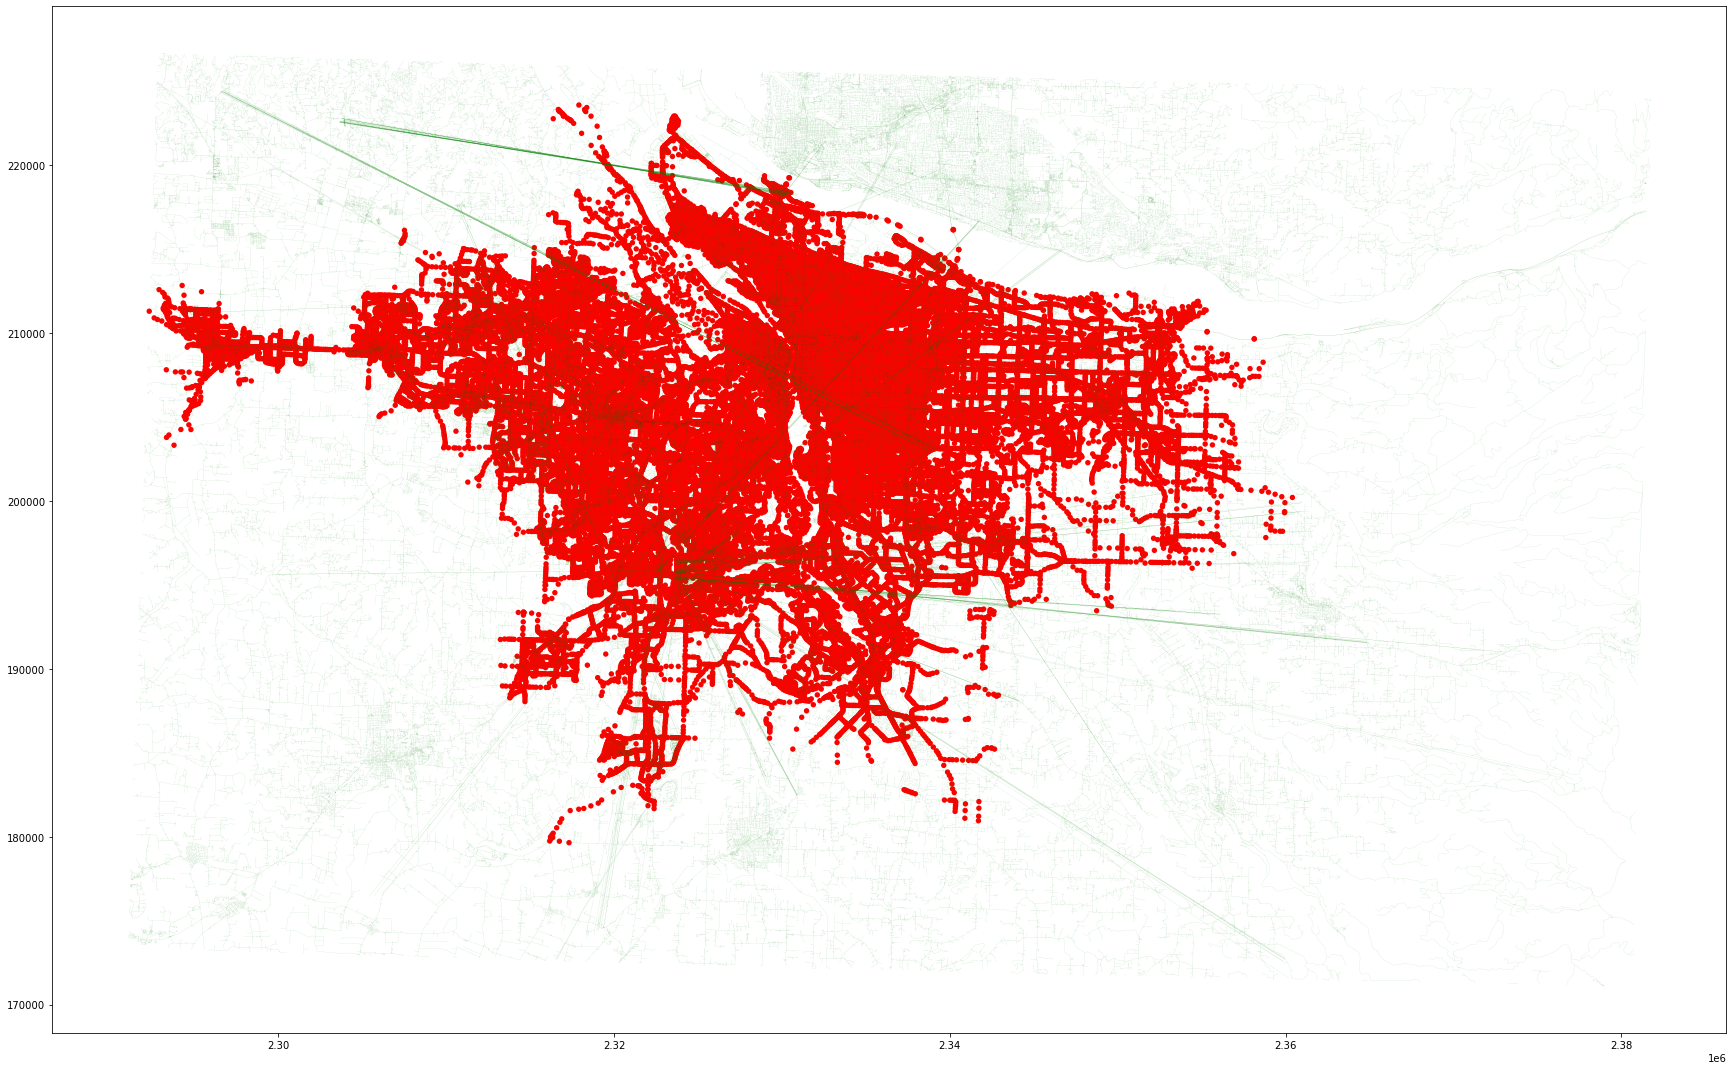

In [203]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [204]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

osm_id                   name   ref         type  oneway  bridge  \
161130  653001628                   None  None      service       0       0   
180479  749469251                   None  None      service       0       0   
161132  653001630                   None  None      service       0       0   
155047  589495344  Northwest Swigert Way  None  residential       0       0   
161131  653001629                   None  None      service       0       0   

        maxspeed                                           geometry  
161130       NaN  MULTILINESTRING ((2351064.882 211581.327, 2351...  
180479       NaN  LINESTRING (2351444.733 211600.280, 2351445.14...  
161132       NaN  LINESTRING (2351028.312 211582.424, 2351027.78...  
155047       NaN  MULTILINESTRING ((2351064.882 211581.327, 2351...  
161131       NaN  LINESTRING (2350969.039 211584.214, 2350969.45...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


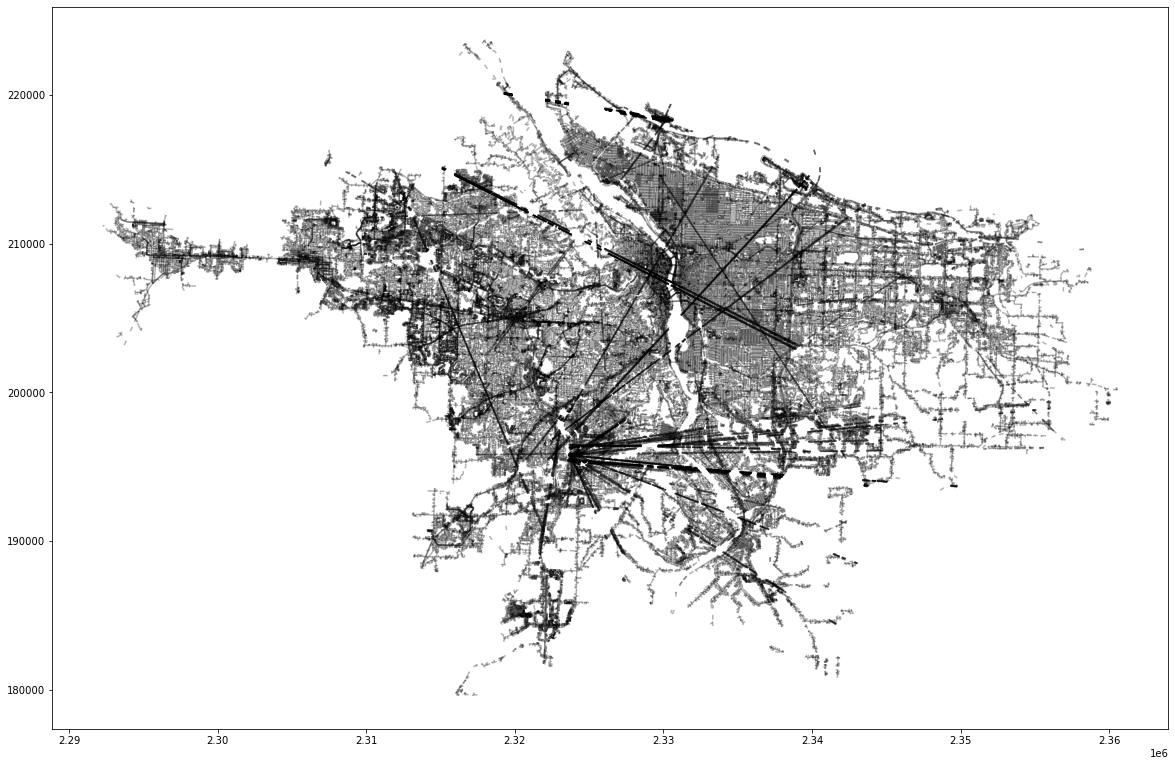

In [205]:
ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect

In [206]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  \
0    196381721.0  520768.0  0.136986    0.013699  196381720   
1    196381721.0  520767.0  0.095890    0.000000  196381720   
2    196381721.0  520766.0  0.109589    0.013699  196381720   
3    589536592.0  804038.0  1.972603    0.630137  196381720   
4    589536596.0  804040.0  1.835616    0.561644  196381720   

                   name   ref      type  oneway  bridge  maxspeed  \
0  Southeast 1st Street  None  tertiary       0       0       NaN   
1  Southeast 1st Street  None  tertiary       0       0       NaN   
2  Southeast 1st Street  None  tertiary       0       0       NaN   
3  Southeast 1st Street  None  tertiary       0       0       NaN   
4  Southeast 1st Street  None  tertiary       0       0       NaN   

                                            geometry  
0  LINESTRING (2351406.314 205204.770, 2351425.65...  
1  LINESTRING (2351406.314 205204.770, 2351425.65...  
2  LINESTRING (2351406.314 205204.770, 2351425.65...  
3  LINESTRING (2351458.029 205202.992, 2351528.63...  
4  LINESTRING (2351480.602 205202.217, 2351528.63...

# Calculate the length of the road segments

In [207]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  \
0    196381721.0  520768.0  0.136986    0.013699  196381720   
1    196381721.0  520767.0  0.095890    0.000000  196381720   
2    196381721.0  520766.0  0.109589    0.013699  196381720   
3    589536592.0  804038.0  1.972603    0.630137  196381720   
4    589536596.0  804040.0  1.835616    0.561644  196381720   

                   name   ref      type  oneway  bridge  maxspeed  \
0  Southeast 1st Street  None  tertiary       0       0       NaN   
1  Southeast 1st Street  None  tertiary       0       0       NaN   
2  Southeast 1st Street  None  tertiary       0       0       NaN   
3  Southeast 1st Street  None  tertiary       0       0       NaN   
4  Southeast 1st Street  None  tertiary       0       0       NaN   

                                            geometry      Length  
0  LINESTRING (2351406.314 205204.770, 2351425.65...  281.383652  
1  LINESTRING (2351406.314 205204.770, 2351425.65...  160.997707  
2  LINESTRING (2351406.314 205204.770, 2351425.65...   66.150458  
3  LINESTRING (2351458.029 205202.992, 2351528.63...  279.747535  
4  LINESTRING (2351480.602 205202.217, 2351528.63...  205.645574

# Aggregrate the road functional class

In [208]:
output_roadfc=inter_road.groupby(by=['ID','type'])['Length'].sum()
output_roadfc

ID        type       
8.0       footway        2961.555397
          primary        1700.308584
          residential     384.840474
          secondary       637.663478
          service        7826.965959
                            ...     
881611.0  footway          31.154434
          residential    5599.311843
          secondary       737.865844
          service         388.248102
          tertiary        151.078768
Name: Length, Length: 381687, dtype: float64

# Calculate the primary road

In [209]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['ID'])['Length'].sum().reset_index()
output_primary.columns=["ID","Primary"]
output_primary.head()

ID      Primary
0   8.0  1700.308584
1  34.0   967.505565
2  35.0  1054.003726
3  36.0   998.392595
4  37.0   902.794830

In [210]:
# # Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['ID'])['Length'].sum().reset_index()
output_secondary.columns=["ID","Secondary"]
output_secondary.head()

ID    Secondary
0   8.0   637.663478
1  18.0  1063.421109
2  20.0  1064.195269
3  35.0   484.852092
4  36.0   354.397041

In [211]:
# # Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['ID'])['Length'].sum().reset_index()
output_tertiary.columns=["ID","Tertiary"]
output_tertiary.head()

ID     Tertiary
0   8.0   442.710632
1  26.0   998.196742
2  30.0  1940.008367
3  31.0  1736.352790
4  34.0   755.573831

In [212]:
# # Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['ID'])['Length'].sum().reset_index()
output_residential.columns=["ID","Residential_Road"]
output_residential.head()

ID  Residential_Road
0   8.0        384.840474
1  10.0       2767.712143
2  18.0       2505.579101
3  20.0       2127.199877
4  26.0       3285.988688

In [213]:
# # Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['ID'])['Length'].sum().reset_index()
output_path.columns=["ID","Path"]
output_path.head()

ID         Path
0  18.0  1240.695679
1  20.0   697.723202
2  30.0   509.478549
3  31.0   574.983284
4  51.0   939.708870

In [214]:
# # calculate cycleway
# # Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['ID'])['Length'].sum().reset_index()
output_cycleway.columns=["ID","Cycleway"] 
output_cycleway.head()

ID     Cycleway
0     30.0   130.849058
1  74869.0    28.487473
2  75328.0   687.642746
3  75329.0  1007.504670
4  75334.0   888.608506

In [215]:
# # Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['ID'])['Length'].sum().reset_index()
output_footway.columns=["ID","Footway"] 
output_footway.head()

ID      Footway
0   8.0  2961.555397
1  18.0  2118.516805
2  20.0  1792.442877
3  26.0   138.798192
4  30.0   567.619532

# Calculcate the mean Speed

In [216]:
# Exclude NAN and zero value first then take the mean
#inter_road.maxspeed.describe()

In [217]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
#inter_road1.head(5) 

In [218]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

index  osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  \
0    524    589536534.0  804021.0  0.109589    0.000000  130809241   
1    525      5535549.0  338410.0  0.438356    0.287671  130809241   
2    526    130809238.0  442979.0  0.054795    0.000000  130809241   
3    527    130809238.0  442981.0  0.082192    0.000000  130809241   
4    528    140344856.0  457862.0  0.068493    0.013699  130809241   

                      name   ref     type  oneway  bridge  maxspeed  \
0  Southeast Burnside Road  None  primary       1       0      35.0   
1  Southeast Burnside Road  None  primary       1       0      35.0   
2  Southeast Burnside Road  None  primary       1       0      35.0   
3  Southeast Burnside Road  None  primary       1       0      35.0   
4  Southeast Burnside Road  None  primary       1       0      35.0   

                                            geometry      Length  
0  LINESTRING (2350871.986 205098.138, 2350871.57...   81.024165  
1  LINESTRING (2350871.986 205098.138, 2350871.57...   65.680084  
2  LINESTRING (2350871.986 205098.138, 2350871.57...  132.339985  
3  LINESTRING (2350871.986 205098.138, 2350871.57...  124.662750  
4  LINESTRING (2350871.986 205098.138, 2350871.57...   32.642531

In [219]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

index  osm_id_sensor        ID    aadb_s  aadb_s_com     osm_id  \
0    524    589536534.0  804021.0  0.109589    0.000000  130809241   
1    525      5535549.0  338410.0  0.438356    0.287671  130809241   
2    526    130809238.0  442979.0  0.054795    0.000000  130809241   
3    527    130809238.0  442981.0  0.082192    0.000000  130809241   
4    528    140344856.0  457862.0  0.068493    0.013699  130809241   

                      name   ref     type  oneway  bridge  maxspeed  \
0  Southeast Burnside Road  None  primary       1       0      35.0   
1  Southeast Burnside Road  None  primary       1       0      35.0   
2  Southeast Burnside Road  None  primary       1       0      35.0   
3  Southeast Burnside Road  None  primary       1       0      35.0   
4  Southeast Burnside Road  None  primary       1       0      35.0   

                                            geometry      Length  
0  LINESTRING (2350871.986 205098.138, 2350871.57...   81.024165  
1  LINESTRING (2350871.986 205098.138, 2350871.57...   65.680084  
2  LINESTRING (2350871.986 205098.138, 2350871.57...  132.339985  
3  LINESTRING (2350871.986 205098.138, 2350871.57...  124.662750  
4  LINESTRING (2350871.986 205098.138, 2350871.57...   32.642531

In [220]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['ID'])['maxspeed'].agg(pd.Series.mode).reset_index() # revised
output_meanspeed.columns=['ID','maxspeed']
output_meanspeed.head()

ID maxspeed
0   8.0     45.0
1  10.0     25.0
2  18.0     40.0
3  20.0     40.0
4  26.0     25.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [221]:
def min_distance_pline(point, line):
    return line.distance(point).min()

In [222]:
#ecoshort.head()

In [223]:
#road_proj.head(5)

In [224]:
#print(road_proj.crs)
#print(ecoshort.crs)

In [225]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                         name     ref     type  oneway  \
0     20  4690136  Northwest Bethany Boulevard    None  primary       0   
1   2885  5288409            Proctor Boulevard   US 26  primary       1   
2   3074  5289540     Southeast Sunnyside Road    None  primary       1   
3   3099  5289670         Southeast 1st Avenue  OR 99E  primary       0   
4   3402  5290853            Pioneer Boulevard   US 26  primary       1   

   bridge  maxspeed                                           geometry  
0       0      35.0  LINESTRING (2317095.702 210007.374, 2317100.77...  
1       0      25.0  LINESTRING (2362567.823 193771.422, 2362554.75...  
2       0      40.0  LINESTRING (2338449.854 198379.134, 2338466.66...  
3       0      35.0  LINESTRING (2328190.079 179734.302, 2328248.65...  
4       0      25.0  LINESTRING (2361553.518 193797.982, 2361555.82...

# In the below pline distance, you can see counter is located little far away from the link

In [226]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

In [227]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [228]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [229]:
# #https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

In [230]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  
61181         32049.817932             6352.901927      35.0  
84606         31166.100816             6797.818660      25.0  
61180         31956.629933             6386.015557      25.0  
27038         30039.061287             7622.789529      35.0  
61179         31883.337831             6413.573717      25.0

In [231]:
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  
61181         32049.817932             6352.901927      35.0  
84606         31166.100816             6797.818660      25.0  
61180         31956.629933             6386.015557      25.0  
27038         30039.061287             7622.789529      35.0  
61179         31883.337831             6413.573717      25.0

In [232]:
road_proj2.head()

index   osm_id                         name     ref     type  oneway  \
0     20  4690136  Northwest Bethany Boulevard    None  primary       0   
1   2885  5288409            Proctor Boulevard   US 26  primary       1   
2   3074  5289540     Southeast Sunnyside Road    None  primary       1   
3   3099  5289670         Southeast 1st Avenue  OR 99E  primary       0   
4   3402  5290853            Pioneer Boulevard   US 26  primary       1   

   bridge  maxspeed                                           geometry  
0       0      35.0  LINESTRING (2317095.702 210007.374, 2317100.77...  
1       0      25.0  LINESTRING (2362567.823 193771.422, 2362554.75...  
2       0      40.0  LINESTRING (2338449.854 198379.134, 2338466.66...  
3       0      35.0  LINESTRING (2328190.079 179734.302, 2328248.65...  
4       0      25.0  LINESTRING (2361553.518 193797.982, 2361555.82...

In [233]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2,  left_on='osm_id_sensor',right_on='osm_id',how='inner')
pt_speed_v1.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
0     45481307.0  365522.0  0.657534    0.178082   
1     45481307.0  365521.0  0.684932    0.205479   
2    161820452.0  481735.0  0.630137    0.232877   
3    161820452.0  481734.0  0.657534    0.246575   
4      5535549.0  338410.0  0.438356    0.287671   

                       geometry_x  min_dist_to_school  min_dist_to_college  \
0  POINT (2350498.074 205209.074)         2151.072703         30039.061287   
1  POINT (2350459.929 205239.683)         2159.878328         29879.409391   
2  POINT (2350509.408 205212.135)         2181.895279         30058.575818   
3  POINT (2350540.476 205156.534)         2110.903016         30259.104758   
4  POINT (2350789.013 205214.317)         2847.812119         30715.633990   

   min_dist_to_university  maxspeed_x  index     osm_id  \
0             7622.789529        35.0  39677   45481307   
1             7620.500111        35.0  39677   45481307   
2             7592.293228        35.0  79535  161820452   
3             7678.532451        35.0  79535  161820452   
4             7070.108096        35.0  26963    5535549   

                      name    ref     type  oneway  bridge  maxspeed_y  \
0    East Powell Boulevard  US 26  primary       1       0        35.0   
1    East Powell Boulevard  US 26  primary       1       0        35.0   
2    East Powell Boulevard  US 26  primary       1       0        35.0   
3    East Powell Boulevard  US 26  primary       1       0        35.0   
4  Southeast Burnside Road   None  primary       0       0        35.0   

                                          geometry_y  
0  LINESTRING (2350431.576 205259.394, 2350443.27...  
1  LINESTRING (2350431.576 205259.394, 2350443.27...  
2  LINESTRING (2350552.009 205113.208, 2350553.62...  
3  LINESTRING (2350552.009 205113.208, 2350553.62...  
4  LINESTRING (2350777.979 205230.197, 2350783.69...

In [234]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#ecoshort.plot(ax=ax,color="red")
#road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [235]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['ID'])['maxspeed'].mean().reset_index()
output_pointspeed.head()

ID  maxspeed
0   8.0      45.0
1  10.0      25.0
2  18.0      40.0
3  20.0      40.0
4  26.0      25.0

In [236]:
output_pointspeed.columns=["ID","Point Speed"]
output_pointspeed.head()

ID  Point Speed
0   8.0         45.0
1  10.0         25.0
2  18.0         40.0
3  20.0         40.0
4  26.0         25.0

In [237]:
#pt_speed_v1.columns

In [238]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['ID'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['ID','maxspeed']
output_pointspeed_v2

ID  maxspeed
0          10.0      25.0
1          18.0      40.0
2          20.0      40.0
3          26.0      25.0
4          34.0      30.0
...         ...       ...
47388  881607.0      20.0
47389  881608.0      20.0
47390  881609.0      20.0
47391  881610.0      20.0
47392  881611.0      20.0

[47393 rows x 2 columns]

# Calculate the road type underneath of count station

In [239]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

In [240]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                         name     ref     type  oneway  \
0     20  4690136  Northwest Bethany Boulevard    None  primary       0   
1   2885  5288409            Proctor Boulevard   US 26  primary       1   
2   3074  5289540     Southeast Sunnyside Road    None  primary       1   
3   3099  5289670         Southeast 1st Avenue  OR 99E  primary       0   
4   3402  5290853            Pioneer Boulevard   US 26  primary       1   

   bridge  maxspeed                                           geometry  
0       0      35.0  LINESTRING (2317095.702 210007.374, 2317100.77...  
1       0      25.0  LINESTRING (2362567.823 193771.422, 2362554.75...  
2       0      40.0  LINESTRING (2338449.854 198379.134, 2338466.66...  
3       0      35.0  LINESTRING (2328190.079 179734.302, 2328248.65...  
4       0      25.0  LINESTRING (2361553.518 193797.982, 2361555.82...

In [241]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

In [242]:
ecoshort.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  
61181         32049.817932             6352.901927      35.0  
84606         31166.100816             6797.818660      25.0  
61180         31956.629933             6386.015557      25.0  
27038         30039.061287             7622.789529      35.0  
61179         31883.337831             6413.573717      25.0

In [243]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id_sensor',how='inner')
#road_merged_inner.head()

In [244]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index   osm_id                         name     ref     type  oneway  \
0     20  4690136  Northwest Bethany Boulevard    None  primary       0   
1     20  4690136  Northwest Bethany Boulevard    None  primary       0   
2   3439  5291032       South Beavercreek Road    None  primary       0   
3   3610  5291897        Southeast Highway 212  OR 212  primary       0   
4   3610  5291897        Southeast Highway 212  OR 212  primary       0   

   bridge  maxspeed_x                                         geometry_x  \
0       0        35.0  LINESTRING (2317095.702 210007.374, 2317100.77...   
1       0        35.0  LINESTRING (2317095.702 210007.374, 2317100.77...   
2       0        35.0  LINESTRING (2340368.705 182173.479, 2340363.37...   
3       0        35.0  LINESTRING (2347419.857 196414.826, 2347396.64...   
4       0        35.0  LINESTRING (2347419.857 196414.826, 2347396.64...   

   osm_id_sensor       ID    aadb_s  aadb_s_com  \
0      4690136.0     52.0  6.068493    2.041096   
1      4690136.0     53.0  7.849315    2.424658   
2      5291032.0  81795.0  0.041096    0.000000   
3      5291897.0  82282.0  0.506849    0.123288   
4      5291897.0  82283.0  0.506849    0.136986   

                       geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (2317099.668 210017.913)         2652.446304         13641.552959   
1  POINT (2317132.355 210082.019)         2429.977482         13477.262079   
2  POINT (2340261.358 182626.934)         5237.905265         15034.485085   
3  POINT (2347407.140 196415.542)          553.296545         32679.179824   
4  POINT (2347356.359 196415.868)          608.050876         32516.504592   

   min_dist_to_university  maxspeed_y  
0             9229.885119        35.0  
1             9407.786413        35.0  
2            48075.692515        35.0  
3            37904.917388        35.0  
4            37969.131726        35.0

In [245]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


In [246]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'osm_id_sensor', 'ID', 'aadb_s',
       'aadb_s_com', 'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'maxspeed_y'],
      dtype='object')

In [247]:
pt_road_type1=road_merged_inner.loc[:,['ID','type']]
pt_road_type1.columns=['ID','road_type']
pt_road_type1.head()

ID road_type
0     52.0   primary
1     53.0   primary
2  81795.0   primary
3  82282.0   primary
4  82283.0   primary

# Convert this road catagory to binary as follows- yes=1 or No=0

In [248]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

ID road_type  primary_binary  secondary_binary  tertiary_binary  \
0     52.0   primary               1                 0                0   
1     53.0   primary               1                 0                0   
2  81795.0   primary               1                 0                0   
3  82282.0   primary               1                 0                0   
4  82283.0   primary               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [249]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2.head()

ID  primary_binary  secondary_binary  tertiary_binary  \
0     52.0               1                 0                0   
1     53.0               1                 0                0   
2  81795.0               1                 0                0   
3  82282.0               1                 0                0   
4  82283.0               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [250]:
#bridge=inter_road.copy()
#output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# # Convert binary, presence of bridge=1, absence of bridge=0
#output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
#output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
#output_bridge.columns=['ID','bridge']
#output_bridge.head()

# Calculate the bridge from spatial join of count location and bridge line shape file

In [251]:
bridge_only=road_proj
bridge_only.head(5)

osm_id                        name   ref           type  oneway  bridge  \
0  4440143      Northeast Hodes Street  None    residential       0       0   
1  4440967     Northeast Butler Street  None      secondary       0       0   
2  4441934                        None  None  motorway_link       1       0   
3  4443830       Northeast 85th Avenue  None    residential       0       0   
4  4443836  Northeast Windstone Street  None    residential       0       0   

   maxspeed                                           geometry  
0      25.0  LINESTRING (2313114.363 209795.929, 2313130.80...  
1       NaN  LINESTRING (2312182.520 210710.249, 2312185.06...  
2       NaN  LINESTRING (2315133.607 210977.179, 2315153.70...  
3      25.0  LINESTRING (2313220.539 210079.632, 2313218.92...  
4      25.0  LINESTRING (2313381.281 210038.384, 2313371.72...

In [252]:
#count_station
#bridge_only.columns

In [253]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
0    196381721.0  520768.0  0.136986    0.013699   
1    196381721.0  520767.0  0.095890    0.000000   
2    196381721.0  520766.0  0.109589    0.013699   
3    196381721.0  520765.0  0.123288    0.013699   
4    196381721.0  520764.0  0.123288    0.013699   

                       geometry_x  min_dist_to_school  min_dist_to_college  \
0  POINT (2351331.390 205207.818)         2313.723113         32049.817932   
1  POINT (2351294.714 205208.998)         2404.346886         31956.629933   
2  POINT (2351265.818 205209.929)         2477.533230         31883.337831   
3  POINT (2351218.054 205211.461)         2601.566881         31762.450664   
4  POINT (2351153.279 205213.532)         2775.062508         31599.027954   

   min_dist_to_university  maxspeed_x     osm_id                  name   ref  \
0             6352.901927        35.0  196381721  Southeast 1st Street  None   
1             6386.015557        25.0  196381721  Southeast 1st Street  None   
2             6413.573717        25.0  196381721  Southeast 1st Street  None   
3             6461.946145        25.0  196381721  Southeast 1st Street  None   
4             6533.002207        25.0  196381721  Southeast 1st Street  None   

       type  oneway  bridge  maxspeed_y  \
0  tertiary       0       0         NaN   
1  tertiary       0       0         NaN   
2  tertiary       0       0         NaN   
3  tertiary       0       0         NaN   
4  tertiary       0       0         NaN   

                                          geometry_y  
0  LINESTRING (2351043.894 205216.213, 2351050.41...  
1  LINESTRING (2351043.894 205216.213, 2351050.41...  
2  LINESTRING (2351043.894 205216.213, 2351050.41...  
3  LINESTRING (2351043.894 205216.213, 2351050.41...  
4  LINESTRING (2351043.894 205216.213, 2351050.41...

In [254]:
# Join by OSM ID
pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
pointInline_bridge_v2


osm_id                             name   ref         type  oneway  \
0        4440967          Northeast Butler Street  None    secondary       0   
1        4443830            Northeast 85th Avenue  None  residential       0   
2        4490031  Northwest Cedar Hills Boulevard  None    secondary       0   
3        4490031  Northwest Cedar Hills Boulevard  None    secondary       0   
4        4490043            Northeast 87th Avenue  None  residential       0   
...          ...                              ...   ...          ...     ...   
83125  738967188          Southeast Ankeny Street  None  residential       0   
83126  738967188          Southeast Ankeny Street  None  residential       0   
83127  738967188          Southeast Ankeny Street  None  residential       0   
83128  738967188          Southeast Ankeny Street  None  residential       0   
83129  738967189            Southeast 16th Avenue  None  residential       0   

       bridge  maxspeed                                         geometry_x  \
0           0       NaN  LINESTRING (2312182.520 210710.249, 2312185.06...   
1           0      25.0  LINESTRING (2313220.539 210079.632, 2313218.92...   
2           0      40.0  LINESTRING (2320913.555 208766.293, 2320915.51...   
3           0      40.0  LINESTRING (2320913.555 208766.293, 2320915.51...   
4           0      25.0  LINESTRING (2313350.887 209556.268, 2313351.96...   
...       ...       ...                                                ...   
83125       0      20.0  LINESTRING (2332095.725 208422.867, 2332175.28...   
83126       0      20.0  LINESTRING (2332095.725 208422.867, 2332175.28...   
83127       0      20.0  LINESTRING (2332095.725 208422.867, 2332175.28...   
83128       0      20.0  LINESTRING (2332095.725 208422.867, 2332175.28...   
83129       0      20.0  LINESTRING (2332095.725 208422.867, 2332093.78...   

            OSM_ID        ID     aadb_s  aadb_s_com  \
0        4440967.0       8.0   1.767123    1.191781   
1        4443830.0      10.0   0.013699    0.000000   
2        4490031.0      20.0   2.369863    1.164384   
3        4490031.0      18.0   2.383562    1.164384   
4        4490043.0      26.0   0.013699    0.000000   
...            ...       ...        ...         ...   
83125  738967188.0  881608.0  58.589041   41.863014   
83126  738967188.0  881607.0  58.301370   41.876712   
83127  738967188.0  881610.0  58.616438   41.753425   
83128  738967188.0  881609.0  58.575342   41.808219   
83129  738967189.0  881611.0  13.027397    8.219178   

                           geometry_y  
0      POINT (2312203.296 210694.932)  
1      POINT (2313218.619 210063.256)  
2      POINT (2321002.474 208513.623)  
3      POINT (2320942.213 208672.978)  
4      POINT (2313371.564 209816.015)  
...                               ...  
83125  POINT (2332213.706 208419.834)  
83126  POINT (2332134.396 208422.280)  
83127  POINT (2332374.005 208414.905)  
83128  POINT (2332296.413 208417.293)  
83129  POINT (2332093.647 208386.805)  

[83130 rows x 13 columns]

In [255]:
output_point_bridge=pointInline_bridge.groupby(by=['ID'])['bridge'].sum().reset_index()
output_point_bridge.head()

ID  bridge
0   8.0       0
1  10.0       0
2  18.0       0
3  20.0       0
4  26.0       0

In [256]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["ID","Point Bridge"]
output_point_bridge.head()

ID  Point Bridge
0   8.0             2
1  10.0             2
2  18.0             2
3  20.0             2
4  26.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [257]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

In [258]:
nature_proj1.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [259]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

osm_id                  name  type  \
12  23226226         Library Green  park   
13  23226227   Beaverton City Park  park   
14  23226241         Griffith Park  park   
15  23240422         Memorial Park  park   
16  23240423  Little People's Park  park   

                                             geometry  
12  POLYGON ((2319865.876 204453.857, 2319873.163 ...  
13  POLYGON ((2319708.428 204481.909, 2319719.794 ...  
14  POLYGON ((2320515.779 204636.197, 2320514.297 ...  
15  POLYGON ((2319733.467 204299.410, 2319712.112 ...  
16  POLYGON ((2320831.119 204315.002, 2320831.315 ...

In [260]:
#ecoshort.head(5)

In [261]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
#ecoshort.head()

In [262]:
Park_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
Park_distance1.columns=["ID","Distance to Park"]
Park_distance1.head()

ID  Distance to Park
61181  520768.0       1210.126256
84606  804021.0       2221.810609
61180  520767.0       1302.329833
27038  365522.0       2628.915063
61179  520766.0       1378.037965

# cc distance to park

In [263]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
parkcc_distance1.columns=["ID","Distance to Park Center"]
parkcc_distance1.head()

ID  Distance to Park Center
61181  520768.0              1616.758767
84606  804021.0              2522.966842
61180  520767.0              1690.543958
27038  365522.0              2881.263725
61179  520766.0              1752.315652

# Distance to water body

In [264]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

osm_id          name   type  \
0  4946908  Johnson Lake  water   
1  4946909          None  water   
2  4946910          None  water   
3  4946943          None  water   
4  4946969          None  water   

                                            geometry  
0  POLYGON ((2338708.334 213130.725, 2338705.232 ...  
1  POLYGON ((2336249.035 213912.791, 2336249.987 ...  
2  POLYGON ((2335119.556 214144.065, 2335122.656 ...  
3  POLYGON ((2337406.144 213587.835, 2337415.023 ...  
4  POLYGON ((2340158.194 212791.429, 2340135.944 ...

In [265]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  \
61181         32049.817932             6352.901927      35.0   
84606         31166.100816             6797.818660      25.0   
61180         31956.629933             6386.015557      25.0   
27038         30039.061287             7622.789529      35.0   
61179         31883.337831             6413.573717      25.0   

       min_dist_to_polygon  
61181          4687.595515  
84606          5757.835367  
61180          4801.976938  
27038          6522.831174  
61179          4892.295848

In [266]:
water_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
water_distance1.columns=["ID","Distance to Water Body"]
water_distance1.head()

ID  Distance to Water Body
61181  520768.0             4687.595515
84606  804021.0             5757.835367
61180  520767.0             4801.976938
27038  365522.0             6522.831174
61179  520766.0             4892.295848

In [267]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
watercc_distance1.columns=["ID","Distance to Water Center"]
watercc_distance1.head()

ID  Distance to Water Center
61181  520768.0               4810.377802
84606  804021.0               5959.433771
61180  520767.0               4925.501239
27038  365522.0               6880.426849
61179  520766.0               5016.375861

# Distance To  Forest

In [268]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

osm_id             name    type  \
7    4951160   McGuire Island  forest   
8    4951161             None  forest   
9    4951163  Ackerman Island  forest   
10   4951565      East Island  forest   
11  23225779             None  forest   

                                             geometry  
7   POLYGON ((2345349.066 212653.673, 2345219.613 ...  
8   POLYGON ((2347473.712 212397.505, 2347482.688 ...  
9   POLYGON ((2346387.798 214226.327, 2346493.014 ...  
10  POLYGON ((2331173.062 203544.184, 2331139.233 ...  
11  POLYGON ((2319223.438 206118.306, 2319202.631 ...

In [269]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  \
61181         32049.817932             6352.901927      35.0   
84606         31166.100816             6797.818660      25.0   
61180         31956.629933             6386.015557      25.0   
27038         30039.061287             7622.789529      35.0   
61179         31883.337831             6413.573717      25.0   

       min_dist_to_polygon  
61181          1301.261030  
84606          2120.182433  
61180          1411.617738  
27038          3303.025446  
61179          1499.650206

In [270]:
forest_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
forest_distance1.columns=["ID","Distance to forest"]
forest_distance1.head()

ID  Distance to forest
61181  520768.0         1301.261030
84606  804021.0         2120.182433
61180  520767.0         1411.617738
27038  365522.0         3303.025446
61179  520766.0         1499.650206

In [271]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
forestcc_distance1.columns=["ID","Distance to Forest Center"]
forestcc_distance1.head()

ID  Distance to Forest Center
61181  520768.0                1424.730354
84606  804021.0                2249.968087
61180  520767.0                1534.214018
27038  365522.0                3479.884620
61179  520766.0                1621.560201

# Distance to green space area

In [272]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

osm_id  name   type                                           geometry
1    24000302  None  grass  POLYGON ((2316254.380 207136.871, 2316258.462 ...
96   36796200  None  grass  POLYGON ((2331010.097 209484.287, 2331026.737 ...
109  39412221  None  grass  POLYGON ((2330760.060 210843.431, 2330814.337 ...
120  40775705  None  grass  POLYGON ((2331120.983 207412.715, 2331139.760 ...
125  40941298  None  grass  POLYGON ((2330792.988 211074.076, 2330815.557 ...

In [273]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  \
61181         32049.817932             6352.901927      35.0   
84606         31166.100816             6797.818660      25.0   
61180         31956.629933             6386.015557      25.0   
27038         30039.061287             7622.789529      35.0   
61179         31883.337831             6413.573717      25.0   

       min_dist_to_polygon  
61181          1537.845645  
84606          2082.440944  
61180          1564.872901  
27038          3340.770701  
61179          1592.268108

In [274]:
grass_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
grass_distance1.columns=["ID","Distance to Grass"]
grass_distance1.head()

ID  Distance to Grass
61181  520768.0        1537.845645
84606  804021.0        2082.440944
61180  520767.0        1564.872901
27038  365522.0        3340.770701
61179  520766.0        1592.268108

In [275]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
grasscc_distance1.columns=["ID","Distance to Grass Center"]
grasscc_distance1.head()

ID  Distance to Grass Center
61181  520768.0               1637.830769
84606  804021.0               2163.185369
61180  520767.0               1664.229537
27038  365522.0               3396.590515
61179  520766.0               1690.786972

# Distance to commercial

In [276]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
commercial_distance1.columns=["ID","Distance to Commercial Area"]
commercial_distance1.head()

ID  Distance to Commercial Area
61181  520768.0                 10599.069386
84606  804021.0                  9866.149206
61180  520767.0                 10517.962915
27038  365522.0                  9050.844437
61179  520766.0                 10454.594037

In [277]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
commercialcc_distance1.columns=["ID","Distance to Commercial Area Center"]
commercialcc_distance1.head()

ID  Distance to Commercial Area Center
61181  520768.0                        11097.870884
84606  804021.0                        10350.632856
61180  520767.0                        11015.598196
27038  365522.0                         9506.081139
61179  520766.0                        10951.274084

# Distance to industrial area

In [278]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
industrial_distance1.columns=["ID","Distance to Industrial Area"]
industrial_distance1.head()

ID  Distance to Industrial Area
61181  520768.0                 14007.753179
84606  804021.0                 12915.542960
61180  520767.0                 13894.630161
27038  365522.0                 11511.613314
61179  520766.0                 13805.590931

In [279]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
industrialcc_distance1.columns=["ID","Distance to Industrial Center"]
industrialcc_distance1.head()

ID  Distance to Industrial Center
61181  520768.0                   14522.607745
84606  804021.0                   13438.679547
61180  520767.0                   14410.233064
27038  365522.0                   12046.642708
61179  520766.0                   14321.788561

# Distance to Retail area

In [280]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
retail_distance1.columns=["ID","Distance to Retail Area"]
retail_distance1.head()

ID  Distance to Retail Area
61181  520768.0               697.846951
84606  804021.0                65.864949
61180  520767.0               595.077325
27038  365522.0               817.448211
61179  520766.0               514.110434

In [281]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
retailcc_distance1.columns=["ID","Distance to Retail Center"]
retailcc_distance1.head()

ID  Distance to Retail Center
61181  520768.0                1109.426533
84606  804021.0                 411.802966
61180  520767.0                1027.405640
27038  365522.0                1157.021749
61179  520766.0                 968.450975

# Distance to Residential

In [282]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
residential_distance1.columns=["ID","Distance to Residential Area"]
# residential_distance1.head()

In [283]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['ID','min_dist_to_polygon']]
residentialcc_distance1.columns=["ID","Distance to Residential Center"]
residentialcc_distance1.head()

ID  Distance to Residential Center
61181  520768.0                     5270.988627
84606  804021.0                     4907.520120
61180  520767.0                     5219.524248
27038  365522.0                     4473.784680
61179  520766.0                     5180.586130

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [284]:
#building1.head(5)

In [285]:
# # Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2838)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Portland City Hall')]
bld_proj1

osm_id                name    type  \
5979  141453089  Portland City Hall  public   

                                               geometry  
5979  POLYGON ((2329750.752 207701.308, 2329755.095 ...

In [286]:
#bld_proj1.geometry.boundary.plot()

In [287]:
# # copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# # change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

osm_id                name    type                        geometry
5979  141453089  Portland City Hall  public  POINT (2329765.806 207688.570)

In [288]:
# fig, ax = plt.subplots(figsize = (15,10)) 
# bld_proj2.plot(ax=ax,color="green",edgecolor='k')
# bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [289]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  \
61181         32049.817932             6352.901927      35.0   
84606         31166.100816             6797.818660      25.0   
61180         31956.629933             6386.015557      25.0   
27038         30039.061287             7622.789529      35.0   
61179         31883.337831             6413.573717      25.0   

       min_dist_to_polygon  min_dist_to_CBD  
61181          5270.988627     71219.815712  
84606          4907.520120     70044.063669  
61180          5219.524248     71099.834360  
27038          4473.784680     68503.975512  
61179          5180.586130     71005.306706

In [290]:
CBD_distance1=ecoshort.loc[:,['ID','min_dist_to_CBD']]
CBD_distance1.columns=["ID","Distance to CBD"]
CBD_distance1.head()

ID  Distance to CBD
61181  520768.0     71219.815712
84606  804021.0     70044.063669
61180  520767.0     71099.834360
27038  365522.0     68503.975512
61179  520766.0     71005.306706

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [291]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [292]:
bg.shape

(2627, 16)

In [293]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [294]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [295]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2838')
bg_proj.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((2679731.350 136865.451, 2679752.280 ...  
1  POLYGON ((2701277.965 152087.049, 2701093.604 ...  
2  POLYGON ((2706558.268 133671.514, 2706650.307 ...  
3  POLYGON ((2707186.724 128851.700, 2707187.625 ...  
4  POLYGON ((2711345.513 127396.863, 2711346.377 ...

In [296]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  Total block Area  
0  POLYGON ((2679731.350 136865.451, 2679752.280 ...      2.219628e+09  
1  POLYGON ((2701277.965 152087.049, 2701093.604 ...      1.926638e+08  
2  POLYGON ((2706558.268 133671.514, 2706650.307 ...      4.729412e+08  
3  POLYGON ((2707186.724 128851.700, 2707187.625 ...      1.468767e+07  
4  POLYGON ((2711345.513 127396.863, 2711346.377 ...      1.009327e+06

In [297]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
#race.head(5)

In [298]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
#race1.head(5)

In [299]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
#race2.head(5)

In [300]:
#race2["Total block Area"]=race2.area
#race2

In [301]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
#buffer_clip_race.head(5)

In [302]:
#ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [303]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com     INTPTLAT      INTPTLON  \
0    196381721.0  520768.0  0.136986    0.013699  +45.4966160  -122.4025340   
1    589536534.0  804021.0  0.109589    0.000000  +45.4966160  -122.4025340   
2    196381721.0  520767.0  0.095890    0.000000  +45.4966160  -122.4025340   
3    196381721.0  520766.0  0.109589    0.013699  +45.4966160  -122.4025340   
4    196381721.0  520765.0  0.123288    0.013699  +45.4966160  -122.4025340   

           GISJOIN   Shape_Leng     Shape_Area  AHY2E001  AHY2E002  AHY2E003  \
0  G41005100104111  3226.185631  511090.207303      1561      1209       129   
1  G41005100104111  3226.185631  511090.207303      1561      1209       129   
2  G41005100104111  3226.185631  511090.207303      1561      1209       129   
3  G41005100104111  3226.185631  511090.207303      1561      1209       129   
4  G41005100104111  3226.185631  511090.207303      1561      1209       129   

   Total block Area                                           geometry  
0     511002.385181  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1     511002.385181  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2     511002.385181  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3     511002.385181  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4     511002.385181  POLYGON ((2351378.213 205195.686, 2351375.895 ...

In [304]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
#inter_race.head(5)

In [305]:
output_pct_race= inter_race.loc[:, ['ID', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
#output_pct_race.head(5)

In [306]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

ID    AHY2E001    AHY2E002   AHY2E003
0  520768.0  248.157607  192.198941  20.507579
1  804021.0  128.947377   99.870198  10.656125
2  520767.0  248.157607  192.198941  20.507579
3  520766.0  245.881778  190.436303  20.319506
4  520765.0  232.437144  180.023387  19.208451

# Aggregate by ID

In [307]:
output_pct_race=output_pct_race.groupby('ID', as_index=False).sum()
output_pct_race.head()

ID    AHY2E001    AHY2E002   AHY2E003
0   8.0   54.277245   31.740249   0.942268
1  10.0  146.059807   85.740524  10.517446
2  18.0  186.458662  133.115851   2.863979
3  20.0  173.029994  126.720328   2.708563
4  26.0  135.659198   68.579315  12.179602

# Percentange of White and African American

In [308]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
#output_pct_race.head()

In [309]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['ID','pct_white','pct_African_American']
output_pct_race1.head()

ID  pct_white  pct_African_American
0   8.0  58.478002              1.736029
1  10.0  58.702340              7.200780
2  18.0  71.391615              1.535986
3  20.0  73.236047              1.565372
4  26.0  50.552647              8.978088

# Percentage of Male and Female

In [310]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
#gender.head(5)

In [311]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
#gender1.head(5)

In [312]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... AHYQM040 AHYQM041 AHYQM042  AHYQM043  \
233        S  24464388.0   37118.0  ...       31       37       21        31   
232        S  12175030.0   80509.0  ...       59       35       16        12   
231        S  12609594.0    7201.0  ...       47       46       22        31   
237        S  33069417.0  136279.0  ...       68       63       23        54   
203        S   3727710.0    4886.0  ...       65       33       29        56   

     AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
233        10       32        52       34        21        61  
232        31       30        57       40        19        16  
231        22       36        23       22        29        20  
237        37       35        42       24        12        25  
203        28       38        56       52        22        21  

[5 rows x 152 columns]

In [313]:
#ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [314]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 #inter_gender.head(5)

In [315]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
#inter_gender.head(5)

In [316]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['ID', 'AHYQE001', 'AHYQE002', 'AHYQE026','area factor']]
#gender_filter.head()

In [317]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
#gender_filter.head()

In [318]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('ID', as_index=False).sum()
output_pct_gender.head()

ID    AHYQE001    AHYQE002   AHYQE026
0   8.0   54.277245   27.816281  26.460964
1  10.0  146.059807   68.511955  77.547853
2  18.0  186.458662  101.580606  84.878057
3  20.0  173.029994   92.028803  81.001191
4  26.0  135.659198   63.423372  72.235827

In [319]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AHYQE002']/output_pct_gender['AHYQE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AHYQE026']/output_pct_gender['AHYQE001'])*100
output_pct_gender.head()

ID    AHYQE001    AHYQE002   AHYQE026   pct_male  pct_female
0   8.0   54.277245   27.816281  26.460964  51.248514   48.751486
1  10.0  146.059807   68.511955  77.547853  46.906782   53.093218
2  18.0  186.458662  101.580606  84.878057  54.478888   45.521112
3  20.0  173.029994   92.028803  81.001191  53.186618   46.813382
4  26.0  135.659198   63.423372  72.235827  46.751988   53.248012

In [320]:
output_pct_gender1=output_pct_gender.drop(['AHYQE001','AHYQE002','AHYQE026'],axis=1)
output_pct_gender1.columns=['ID','pct_male','pct_female']
output_pct_gender1.head()

ID   pct_male  pct_female
0   8.0  51.248514   48.751486
1  10.0  46.906782   53.093218
2  18.0  54.478888   45.521112
3  20.0  53.186618   46.813382
4  26.0  46.751988   53.248012

# Number of Student (student access) and Education (pct of at least college education population)

In [321]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH04M016  AH04M017  AH04M018  \
0  Baker County        1      NaN     NaN  ...        21        57        17   
1  Baker County        1      NaN     NaN  ...        10        61        19   
2  Baker County        1      NaN     NaN  ...        23        45        41   
3  Baker County        1      NaN     NaN  ...        36        63        23   
4  Baker County        1      NaN     NaN  ...        12        98        34   

   AH04M019  AH04M020  AH04M021  AH04M022  AH04M023  AH04M024  AH04M025  
0        24        66        29        26        13        12         3  
1        35        53        38        23        41        11         2  
2        35        76        37        72        43        22        27  
3        58        30        92        90        36        30        22  
4        46        66        24        87        23        14        12  

[5 rows x 88 columns]

In [322]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
0        S  2.205986e+09  13837275.0  ...       21       57       17   
1        S  1.926901e+08     12317.0  ...       10       61       19   
2        S  4.723892e+08    639439.0  ...       23       45       41   
3        S  1.469016e+07         0.0  ...       36       63       23   
4        S  1.009492e+06         0.0  ...       12       98       34   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
0        24        66       29        26       13        12         3  
1        35        53       38        23       41        11         2  
2        35        76       37        72       43        22        27  
3        58        30       92        90       36        30        22  
4        46        66       24        87       23        14        12  

[5 rows x 104 columns]

In [323]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... AH04M016 AH04M017 AH04M018  AH04M019  \
233        S  24464388.0   37118.0  ...       12       79       50        63   
232        S  12175030.0   80509.0  ...       12       75       20        47   
231        S  12609594.0    7201.0  ...       27      115       31        71   
237        S  33069417.0  136279.0  ...       12      153       24        49   
203        S   3727710.0    4886.0  ...       28      121      103       145   

     AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
233        70       70        80       29        23        29  
232        73       59        76       52        13        12  
231        85       56       108       32        28        12  
237        96      133       136       63        38        27  
203       134      101       127       43        12        12  

[5 rows x 104 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


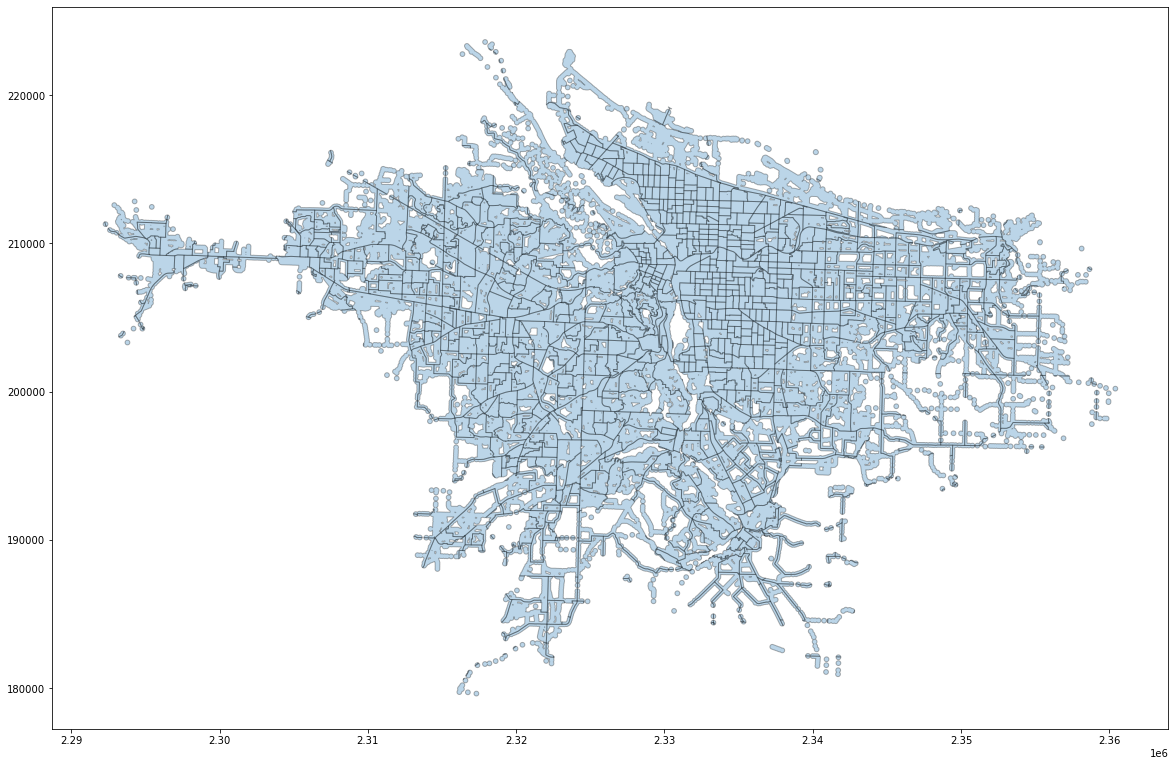

In [324]:
ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [325]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... AH04M017 AH04M018  AH04M019  \
0        1  410510104111  Block Group 1  ...       66       94        42   
1        1  410510104111  Block Group 1  ...       66       94        42   
2        1  410510104111  Block Group 1  ...       66       94        42   
3        1  410510104111  Block Group 1  ...       66       94        42   
4        1  410510104111  Block Group 1  ...       66       94        42   

   AH04M020 AH04M021 AH04M022 AH04M023  AH04M024  AH04M025  \
0        99       65       57       25        12        12   
1        99       65       57       25        12        12   
2        99       65       57       25        12        12   
3        99       65       57       25        12        12   
4        99       65       57       25        12        12   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 108 columns]

In [326]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... AH04M019 AH04M020  AH04M021  \
0        1  410510104111  Block Group 1  ...       42       99        65   
1        1  410510104111  Block Group 1  ...       42       99        65   
2        1  410510104111  Block Group 1  ...       42       99        65   
3        1  410510104111  Block Group 1  ...       42       99        65   
4        1  410510104111  Block Group 1  ...       42       99        65   

   AH04M022 AH04M023 AH04M024 AH04M025  \
0        57       25       12       12   
1        57       25       12       12   
2        57       25       12       12   
3        57       25       12       12   
4        57       25       12       12   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 110 columns]

In [327]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['ID', 'AH04E001', 'AH04E019','AH04E020','AH04E021', 'AH04E022','AH04E023','AH04E024','AH04E025','area factor']]
edu_filter.head()

ID  AH04E001  AH04E019  AH04E020  AH04E021  AH04E022  AH04E023  \
0  520768.0       966        82       177        75       108        26   
1  804021.0       966        82       177        75       108        26   
2  520767.0       966        82       177        75       108        26   
3  520766.0       966        82       177        75       108        26   
4  520765.0       966        82       177        75       108        26   

   AH04E024  AH04E025  area factor  
0         0         0     0.158973  
1         0         0     0.082606  
2         0         0     0.158973  
3         0         0     0.157516  
4         0         0     0.148903

In [328]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

ID    AH04E001   AH04E019   AH04E020   AH04E021   AH04E022  AH04E023  \
0  520768.0  153.568385  13.035826  28.138307  11.923011  17.169136  4.133311   
1  804021.0   79.797031   6.773661  14.621195   6.195422   8.921407  2.147746   
2  520767.0  153.568385  13.035826  28.138307  11.923011  17.169136  4.133311   
3  520766.0  152.160024  12.916275  27.880253  11.813666  17.011680  4.095404   
4  520765.0  143.840026  12.210023  26.355781  11.167704  16.081494  3.871471   

   AH04E024  AH04E025  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0

In [329]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('ID', as_index=False).sum()
output_pct_edu.head()

ID    AH04E001  AH04E019   AH04E020   AH04E021   AH04E022   AH04E023  \
0   8.0   47.771720  2.052338   4.388648   3.936875  13.023957  10.907080   
1  10.0   94.366448  6.808402  15.016793  12.050740  22.421201  10.907189   
2  18.0  141.476354  9.526980  26.332551  14.363958  44.738380  17.143390   
3  20.0  131.701200  8.357729  23.626432  12.894170  42.934356  17.641566   
4  26.0   81.627010  4.130016  11.521956  11.863932  16.862041   8.602008   

   AH04E024  AH04E025  
0  1.949076  6.182830  
1  1.061516  1.551335  
2  5.789291  3.910271  
3  5.904029  3.586078  
4  1.104845  0.920704

# Number of students 

In [330]:
scll.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  ALV5M012  \
0  Baker County        1      NaN  ...         4         5        18   
1  Baker County        1      NaN  ...        17        18         5   
2  Baker County        1      NaN  ...        16        21        11   
3  Baker County        1      NaN  ...         6        73        46   
4  Baker County        1      NaN  ...        12        18        12   

   ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  ALV5M019  
0        12        12        14        12         4        12       130  
1        12        12         7        12        12        10       116  
2        12         7        21         7        21        18       168  
3        22        23        12        11        30        37       153  
4        12        53        12        40        53        12       178  

[5 rows x 82 columns]

Table 1:     School Enrollment by Detailed Level of School for the Population 3 Years and Over
    Universe:    Population 3 years and over
    Source code: B14007
    NHGIS code:  ALV5
        ALV5E001:    Total
        ALV5E002:    Enrolled in school
        ALV5E003:    Enrolled in school: Enrolled in nursery school, preschool
        ALV5E004:    Enrolled in school: Enrolled in kindergarten
        ALV5E005:    Enrolled in school: Enrolled in grade 1
        ALV5E006:    Enrolled in school: Enrolled in grade 2
        ALV5E007:    Enrolled in school: Enrolled in grade 3
        ALV5E008:    Enrolled in school: Enrolled in grade 4
        ALV5E009:    Enrolled in school: Enrolled in grade 5
        ALV5E010:    Enrolled in school: Enrolled in grade 6
        ALV5E011:    Enrolled in school: Enrolled in grade 7
        ALV5E012:    Enrolled in school: Enrolled in grade 8
        ALV5E013:    Enrolled in school: Enrolled in grade 9
        ALV5E014:    Enrolled in school: Enrolled in grade 10
        ALV5E015:    Enrolled in school: Enrolled in grade 11
        ALV5E016:    Enrolled in school: Enrolled in grade 12
        ALV5E017:    Enrolled in school: Enrolled in college, undergraduate years
        ALV5E018:    Enrolled in school: Graduate or professional school
        ALV5E019:    Not enrolled in school

In [331]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
0        S  2.205986e+09  13837275.0  ...        4        5       18   
1        S  1.926901e+08     12317.0  ...       17       18        5   
2        S  4.723892e+08    639439.0  ...       16       21       11   
3        S  1.469016e+07         0.0  ...        6       73       46   
4        S  1.009492e+06         0.0  ...       12       18       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        12        12       14        12        4       12       130  
1        12        12        7        12       12       10       116  
2        12         7       21         7       21       18       168  
3        22        23       12        11       30       37       153  
4        12        53       12        40       53       12       178  

[5 rows x 98 columns]

In [332]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... ALV5M010 ALV5M011 ALV5M012  ALV5M013  \
233        S  24464388.0   37118.0  ...       12       12       12        12   
232        S  12175030.0   80509.0  ...       10       10       13        19   
231        S  12609594.0    7201.0  ...       21       29       18        24   
237        S  33069417.0  136279.0  ...       79       12       73        12   
203        S   3727710.0    4886.0  ...       48       83       41        52   

     ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
233        22       12        10       37       36       145  
232        21       13        12       49       10       175  
231        14       17        50       47       65       297  
237        12       25        35       96       12       362  
203        31       52        41      104       25       241  

[5 rows x 98 columns]

In [333]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE       GEOID_x       NAMELSAD  ... ALV5M011 ALV5M012  ALV5M013  \
0        1  410510104111  Block Group 1  ...       12       14        64   
1        1  410510104111  Block Group 1  ...       12       14        64   
2        1  410510104111  Block Group 1  ...       12       14        64   
3        1  410510104111  Block Group 1  ...       12       14        64   
4        1  410510104111  Block Group 1  ...       12       14        64   

   ALV5M014 ALV5M015 ALV5M016 ALV5M017  ALV5M018  ALV5M019  \
0        10       36       12       97        11       181   
1        10       36       12       97        11       181   
2        10       36       12       97        11       181   
3        10       36       12       97        11       181   
4        10       36       12       97        11       181   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 102 columns]

In [334]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE       GEOID_x       NAMELSAD  ... ALV5M013 ALV5M014  ALV5M015  \
0        1  410510104111  Block Group 1  ...       64       10        36   
1        1  410510104111  Block Group 1  ...       64       10        36   
2        1  410510104111  Block Group 1  ...       64       10        36   
3        1  410510104111  Block Group 1  ...       64       10        36   
4        1  410510104111  Block Group 1  ...       64       10        36   

   ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        12       97       11      181   
1        12       97       11      181   
2        12       97       11      181   
3        12       97       11      181   
4        12       97       11      181   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 104 columns]

In [335]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0    196381721.0      1415       148         5     0.158973
1    589536534.0      1415       148         5     0.082606
2    196381721.0      1415       148         5     0.158973
3    196381721.0      1415       148         5     0.157516
4    196381721.0      1415       148         5     0.148903

In [336]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

osm_id_sensor    ALV5E001   ALV5E017  ALV5E018
0    196381721.0  224.947479  23.528076  0.794867
1    589536534.0  116.886956  12.225632  0.413028
2    196381721.0  224.947479  23.528076  0.794867
3    196381721.0  222.884507  23.312302  0.787578
4    196381721.0  210.697347  22.037602  0.744514

In [337]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

osm_id_sensor  total student
0    196381721.0      24.322943
1    589536534.0      12.638660
2    196381721.0      24.322943
3    196381721.0      24.099880
4    196381721.0      22.782116

In [338]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

osm_id_sensor  total student
0      4440967.0       5.008221
1      4443830.0      19.975574
2      4490031.0      37.063446
3      4490043.0      24.227675
4      4493251.0      44.166739

In [339]:
output_student.columns=['ID', 'Student Access']
output_student.head()

ID  Student Access
0  4440967.0        5.008221
1  4443830.0       19.975574
2  4490031.0       37.063446
3  4490043.0       24.227675
4  4493251.0       44.166739

# Education ( pct of at least college population)

In [340]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

ID    AH04E001  AH04E019   AH04E020   AH04E021   AH04E022   AH04E023  \
0   8.0   47.771720  2.052338   4.388648   3.936875  13.023957  10.907080   
1  10.0   94.366448  6.808402  15.016793  12.050740  22.421201  10.907189   
2  18.0  141.476354  9.526980  26.332551  14.363958  44.738380  17.143390   
3  20.0  131.701200  8.357729  23.626432  12.894170  42.934356  17.641566   
4  26.0   81.627010  4.130016  11.521956  11.863932  16.862041   8.602008   

   AH04E024  AH04E025  total_at_least_college_education  
0  1.949076  6.182830                         42.440804  
1  1.061516  1.551335                         69.817174  
2  5.789291  3.910271                        121.804822  
3  5.904029  3.586078                        114.944362  
4  1.104845  0.920704                         55.005504

In [341]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['AH04E001'])*100
output_pct_edu.head()

ID    AH04E001  AH04E019   AH04E020   AH04E021   AH04E022   AH04E023  \
0   8.0   47.771720  2.052338   4.388648   3.936875  13.023957  10.907080   
1  10.0   94.366448  6.808402  15.016793  12.050740  22.421201  10.907189   
2  18.0  141.476354  9.526980  26.332551  14.363958  44.738380  17.143390   
3  20.0  131.701200  8.357729  23.626432  12.894170  42.934356  17.641566   
4  26.0   81.627010  4.130016  11.521956  11.863932  16.862041   8.602008   

   AH04E024  AH04E025  total_at_least_college_education  \
0  1.949076  6.182830                         42.440804   
1  1.061516  1.551335                         69.817174   
2  5.789291  3.910271                        121.804822   
3  5.904029  3.586078                        114.944362   
4  1.104845  0.920704                         55.005504   

   pct_at_least_college_education  
0                       88.840854  
1                       73.985166  
2                       86.095534  
3                       87.276625  
4                       67.386400

In [342]:
output_pct_edu1=output_pct_edu.loc[:,['ID','pct_at_least_college_education']]
output_pct_edu1.columns=['ID','pct_at_least_college_education']
output_pct_edu1.head()

ID  pct_at_least_college_education
0   8.0                       88.840854
1  10.0                       73.985166
2  18.0                       86.095534
3  20.0                       87.276625
4  26.0                       67.386400

# Median Age

In [343]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
#age.head(5)

In [344]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
#age1.head(5)

In [345]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... BTTRA BTBGA  \
233        S  24464388.0   37118.0  ...   NaN   NaN   
232        S  12175030.0   80509.0  ...   NaN   NaN   
231        S  12609594.0    7201.0  ...   NaN   NaN   
237        S  33069417.0  136279.0  ...   NaN   NaN   
203        S   3727710.0    4886.0  ...   NaN   NaN   

                                                NAME_E  AHYRE001  AHYRE002  \
233  Block Group 1, Census Tract 230.02, Clackamas ...      48.2      46.7   
232  Block Group 2, Census Tract 230.01, Clackamas ...      50.9      51.5   
231  Block Group 1, Census Tract 230.01, Clackamas ...      40.6      40.0   
237  Block Group 3, Census Tract 231, Clackamas Cou...      52.3      52.6   
203  Block Group 1, Census Tract 226.03, Clackamas ...      34.5      33.4   

    AHYRE003                                             NAME_M AHYRM001  \
233     52.0  Block Group 1, Census Tract 230.02, Clackamas ...      9.4   
232     50.8  Block Group 2, Census Tract 230.01, Clackamas ...      5.6   
231     41.3  Block Group 1, Census Tract 230.01, Clackamas ...      3.6   
237     52.1  Block Group 3, Census Tract 231, Clackamas Cou...      5.9   
203     35.6  Block Group 1, Census Tract 226.03, Clackamas ...      2.1   

     AHYRM002  AHYRM003  
233      10.9      10.3  
232      11.0       4.4  
231       8.1       4.6  
237       7.3       6.6  
203       1.6       3.4  

[5 rows x 60 columns]

In [346]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
#inter_age.head(5)

In [347]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
#inter_age.head(5)

In [348]:
#    NHGIS code:  AHYR
#        AHYRE001:    Median age: Total
#        AHYRE002:    Median age: Male
#        AHYRE003:    Median age: Female
age_filter=inter_age.loc[:, ['ID','GEOID','AHYRE001']]
#age_filter.head()

In [349]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

In [350]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [351]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [352]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 9501, Baker County...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 9501, Baker County...   
2     NaN    NaN    NaN  Block Group 3, Census Tract 9501, Baker County...   
3     NaN    NaN    NaN  Block Group 1, Census Tract 9502, Baker County...   
4     NaN    NaN    NaN  Block Group 2, Census Tract 9502, Baker County...   

   AH1PE001                                             NAME_M  AH1PM001  
0   40156.0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1   34000.0  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2   62266.0  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3   78558.0  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4   43625.0  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 40 columns]

In [353]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
0        S  2.205986e+09  13837275.0  ...    NaN    NaN    NaN     NaN    NaN   
1        S  1.926901e+08     12317.0  ...    NaN    NaN    NaN     NaN    NaN   
2        S  4.723892e+08    639439.0  ...    NaN    NaN    NaN     NaN    NaN   
3        S  1.469016e+07         0.0  ...    NaN    NaN    NaN     NaN    NaN   
4        S  1.009492e+06         0.0  ...    NaN    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 9501, Baker County...  40156.0   
1   NaN  Block Group 2, Census Tract 9501, Baker County...  34000.0   
2   NaN  Block Group 3, Census Tract 9501, Baker County...  62266.0   
3   NaN  Block Group 1, Census Tract 9502, Baker County...  78558.0   
4   NaN  Block Group 2, Census Tract 9502, Baker County...  43625.0   

                                              NAME_M  AH1PM001  
0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 56 columns]

In [354]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
233        S  24464388.0   37118.0  ...    NaN    NaN    NaN     NaN    NaN   
232        S  12175030.0   80509.0  ...    NaN    NaN    NaN     NaN    NaN   
231        S  12609594.0    7201.0  ...    NaN    NaN    NaN     NaN    NaN   
237        S  33069417.0  136279.0  ...    NaN    NaN    NaN     NaN    NaN   
203        S   3727710.0    4886.0  ...    NaN    NaN    NaN     NaN    NaN   

    BTBGA                                             NAME_E  AH1PE001  \
233   NaN  Block Group 1, Census Tract 230.02, Clackamas ...   75556.0   
232   NaN  Block Group 2, Census Tract 230.01, Clackamas ...   68125.0   
231   NaN  Block Group 1, Census Tract 230.01, Clackamas ...  103125.0   
237   NaN  Block Group 3, Census Tract 231, Clackamas Cou...   92993.0   
203   NaN  Block Group 1, Census Tract 226.03, Clackamas ...   57171.0   

                                                NAME_M  AH1PM001  
233  Block Group 1, Census Tract 230.02, Clackamas ...   11035.0  
232  Block Group 2, Census Tract 230.01, Clackamas ...   22328.0  
231  Block Group 1, Census Tract 230.01, Clackamas ...   12940.0  
237  Block Group 3, Census Tract 231, Clackamas Cou...   25948.0  
203  Block Group 1, Census Tract 226.03, Clackamas ...    6080.0  

[5 rows x 56 columns]

In [355]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... SDSECA SDUNIA  PUMA5A  BTTRA  \
0        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
1        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
2        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
3        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
4        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
1   NaN  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
2   NaN  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
3   NaN  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
4   NaN  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   

                                              NAME_M  AH1PM001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...    5635.0   
1  Block Group 1, Census Tract 104.11, Multnomah ...    5635.0   
2  Block Group 1, Census Tract 104.11, Multnomah ...    5635.0   
3  Block Group 1, Census Tract 104.11, Multnomah ...    5635.0   
4  Block Group 1, Census Tract 104.11, Multnomah ...    5635.0   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 60 columns]

In [356]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... PUMA5A BTTRA  BTBGA  \
0        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
1        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
2        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
3        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
4        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   

                                              NAME_E AH1PE001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
1  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
2  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
3  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   
4  Block Group 1, Census Tract 104.11, Multnomah ...  37664.0   

                                              NAME_M AH1PM001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...   5635.0   
1  Block Group 1, Census Tract 104.11, Multnomah ...   5635.0   
2  Block Group 1, Census Tract 104.11, Multnomah ...   5635.0   
3  Block Group 1, Census Tract 104.11, Multnomah ...   5635.0   
4  Block Group 1, Census Tract 104.11, Multnomah ...   5635.0   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 62 columns]

In [357]:
#    Table 1:     Median Household Income in the Past 12 Months (in 2017 Inflation-Adjusted Dollars)
#    Universe:    Households
 #   Source code: B19013
 #   NHGIS code:  AH1P
 #       AH1PE001:    Median household income in the past 12 months (in 2017 inflation-adjusted dollars
income_filter=inter_income.loc[:, ['ID','GEOID', 'AH1PE001','area factor']]
income_filter.head(5)

# See rest of the part after hh density

ID         GEOID  AH1PE001  area factor
0  520768.0  410510104111   37664.0     0.158973
1  804021.0  410510104111   37664.0     0.082606
2  520767.0  410510104111   37664.0     0.158973
3  520766.0  410510104111   37664.0     0.157516
4  520765.0  410510104111   37664.0     0.148903

In [358]:
#income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
#income_filter.head(5)

# HH_density

In [359]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Baker County        1      NaN     NaN  ...   
1  Baker County        1      NaN     NaN  ...   
2  Baker County        1      NaN     NaN  ...   
3  Baker County        1      NaN     NaN  ...   
4  Baker County        1      NaN     NaN  ...   

                                              NAME_M  AHZZM001  AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...        70        65   
1  Block Group 2, Census Tract 9501, Baker County...        69        49   
2  Block Group 3, Census Tract 9501, Baker County...        61        63   
3  Block Group 1, Census Tract 9502, Baker County...        80        80   
4  Block Group 2, Census Tract 9502, Baker County...        85        69   

   AHZZM003  AHZZM004  AHZZM005  AHZZM006  AHZZM007  AHZZM008  AHZZM009  
0        67         7         2         7        53        47        19  
1        49        32        17        28        62        61        12  
2        63        37         8        37        36        29        23  
3        78        35        12        35        33        33        12  
4        69        38        38        24        82        78        21  

[5 rows x 56 columns]

In [360]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ...  \
0        S  2.205986e+09  13837275.0  ...   
1        S  1.926901e+08     12317.0  ...   
2        S  4.723892e+08    639439.0  ...   
3        S  1.469016e+07         0.0  ...   
4        S  1.009492e+06         0.0  ...   

                                              NAME_M AHZZM001 AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...       70       65   
1  Block Group 2, Census Tract 9501, Baker County...       69       49   
2  Block Group 3, Census Tract 9501, Baker County...       61       63   
3  Block Group 1, Census Tract 9502, Baker County...       80       80   
4  Block Group 2, Census Tract 9502, Baker County...       85       69   

   AHZZM003  AHZZM004 AHZZM005  AHZZM006 AHZZM007  AHZZM008  AHZZM009  
0        67         7        2         7       53        47        19  
1        49        32       17        28       62        61        12  
2        63        37        8        37       36        29        23  
3        78        35       12        35       33        33        12  
4        69        38       38        24       82        78        21  

[5 rows x 72 columns]

In [361]:
hhdensity1['Total Block HH']=hhdensity1.AHZZE001
hhdensity1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
0        S  2.205986e+09  13837275.0  ...       70       65       67   
1        S  1.926901e+08     12317.0  ...       69       49       49   
2        S  4.723892e+08    639439.0  ...       61       63       63   
3        S  1.469016e+07         0.0  ...       80       80       78   
4        S  1.009492e+06         0.0  ...       85       69       69   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
0         7         2        7        53       47        19             448  
1        32        17       28        62       61        12             402  
2        37         8       37        36       29        23             448  
3        35        12       35        33       33        12             439  
4        38        38       24        82       78        21             447  

[5 rows x 73 columns]

In [362]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
233      41      005  023002        1  410050230021  Block Group 1  G5030   
232      41      005  023001        2  410050230012  Block Group 2  G5030   
231      41      005  023001        1  410050230011  Block Group 1  G5030   
237      41      005  023100        3  410050231003  Block Group 3  G5030   
203      41      005  022603        1  410050226031  Block Group 1  G5030   

    FUNCSTAT       ALAND    AWATER  ... AHZZM001 AHZZM002 AHZZM003  AHZZM004  \
233        S  24464388.0   37118.0  ...       66       70       77        58   
232        S  12175030.0   80509.0  ...       72       63       62        17   
231        S  12609594.0    7201.0  ...       70       80       81        57   
237        S  33069417.0  136279.0  ...      156      152      151        57   
203        S   3727710.0    4886.0  ...      112      128      118       116   

     AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
233        27       54        46       45        27             542  
232        10       14        67       65        15             476  
231        51       31        46       42        17             795  
237        43       36        94       79        56             787  
203        33      115       112       87        66            1381  

[5 rows x 73 columns]

In [363]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... AHZZM002 AHZZM003  AHZZM004  \
0        1  410510104111  Block Group 1  ...       80       69        71   
1        1  410510104111  Block Group 1  ...       80       69        71   
2        1  410510104111  Block Group 1  ...       80       69        71   
3        1  410510104111  Block Group 1  ...       80       69        71   
4        1  410510104111  Block Group 1  ...       80       69        71   

   AHZZM005 AHZZM006 AHZZM007 AHZZM008  AHZZM009  Total Block HH  \
0        51       59       80       71        52             591   
1        51       59       80       71        52             591   
2        51       59       80       71        52             591   
3        51       59       80       71        52             591   
4        51       59       80       71        52             591   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 77 columns]

In [364]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... AHZZM004 AHZZM005  AHZZM006  \
0        1  410510104111  Block Group 1  ...       71       51        59   
1        1  410510104111  Block Group 1  ...       71       51        59   
2        1  410510104111  Block Group 1  ...       71       51        59   
3        1  410510104111  Block Group 1  ...       71       51        59   
4        1  410510104111  Block Group 1  ...       71       51        59   

   AHZZM007 AHZZM008 AHZZM009 Total Block HH  \
0        80       71       52            591   
1        80       71       52            591   
2        80       71       52            591   
3        80       71       52            591   
4        80       71       52            591   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 79 columns]

In [365]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['ID',"GEOID","Total Block HH"]]
hh.head(5)

ID         GEOID  Total Block HH
0  520768.0  410510104111             591
1  804021.0  410510104111             591
2  520767.0  410510104111             591
3  520766.0  410510104111             591
4  520765.0  410510104111             591

In [366]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['ID', 'GEOID','AHZZE001','area factor']]
hhdensity_filter
hh_factor=hhdensity_filter.copy()
hh_factor.head()

ID         GEOID  AHZZE001  area factor
0  520768.0  410510104111       591     0.158973
1  804021.0  410510104111       591     0.082606
2  520767.0  410510104111       591     0.158973
3  520766.0  410510104111       591     0.157516
4  520765.0  410510104111       591     0.148903

In [367]:
hh_factor["buffered_hh"]=hh_factor['AHZZE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AHZZE001']
hh_factor.head() # factor is basically same

ID         GEOID  AHZZE001  area factor  buffered_hh  hh factor
0  520768.0  410510104111       591     0.158973    93.953329   0.158973
1  804021.0  410510104111       591     0.082606    48.819923   0.082606
2  520767.0  410510104111       591     0.158973    93.953329   0.158973
3  520766.0  410510104111       591     0.157516    93.091692   0.157516
4  520765.0  410510104111       591     0.148903    88.001507   0.148903

In [368]:
hh_factor1=hh_factor.loc[:,["ID","GEOID","buffered_hh"]]
hh_factor1.head()

ID         GEOID  buffered_hh
0  520768.0  410510104111    93.953329
1  804021.0  410510104111    48.819923
2  520767.0  410510104111    93.953329
3  520766.0  410510104111    93.091692
4  520765.0  410510104111    88.001507

In [369]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


ID         GEOID   AHZZE001
0  520768.0  410510104111  93.953329
1  804021.0  410510104111  48.819923
2  520767.0  410510104111  93.953329
3  520766.0  410510104111  93.091692
4  520765.0  410510104111  88.001507

In [370]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('ID', as_index=False).sum()
output_hhdensity.head()

ID   AHZZE001
0   8.0  30.849611
1  10.0  61.944140
2  18.0  87.996582
3  20.0  81.451538
4  26.0  56.162961

In [371]:
output_hhdensity.columns=['ID', 'Total_HH']
output_hhdensity.head()

ID   Total_HH
0   8.0  30.849611
1  10.0  61.944140
2  18.0  87.996582
3  20.0  81.451538
4  26.0  56.162961

In [372]:
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity.head()

ID   Total_HH   HH_density
0   8.0  30.849611   981.976611
1  10.0  61.944140  1971.749210
2  18.0  87.996582  2801.026711
3  20.0  81.451538  2592.690859
4  26.0  56.162961  1787.728002

In [373]:
output_hhdensity1=output_hhdensity.loc[:, ['ID', 'HH_density']]
output_hhdensity1.head()

ID   HH_density
0   8.0   981.976611
1  10.0  1971.749210
2  18.0  2801.026711
3  20.0  2592.690859
4  26.0  1787.728002

# Weighted HH_income

In [374]:
whh_income=pd.merge(income_filter, hh_factor1, on=['ID', 'GEOID'])
whh_income.head()

ID         GEOID  AH1PE001  area factor  buffered_hh
0  520768.0  410510104111   37664.0     0.158973    93.953329
1  804021.0  410510104111   37664.0     0.082606    48.819923
2  520767.0  410510104111   37664.0     0.158973    93.953329
3  520766.0  410510104111   37664.0     0.157516    93.091692
4  520765.0  410510104111   37664.0     0.148903    88.001507

In [375]:
whh_income['wt_incme']=whh_income['AH1PE001'].mul(whh_income['buffered_hh'])
whh_income.head()

ID         GEOID  AH1PE001  area factor  buffered_hh      wt_incme
0  520768.0  410510104111   37664.0     0.158973    93.953329  3.538658e+06
1  804021.0  410510104111   37664.0     0.082606    48.819923  1.838754e+06
2  520767.0  410510104111   37664.0     0.158973    93.953329  3.538658e+06
3  520766.0  410510104111   37664.0     0.157516    93.091692  3.506205e+06
4  520765.0  410510104111   37664.0     0.148903    88.001507  3.314489e+06

In [376]:
income_filter=whh_income.drop(['GEOID','AH1PE001','area factor'],axis=1)
income_filter.head()

ID  buffered_hh      wt_incme
0  520768.0    93.953329  3.538658e+06
1  804021.0    48.819923  1.838754e+06
2  520767.0    93.953329  3.538658e+06
3  520766.0    93.091692  3.506205e+06
4  520765.0    88.001507  3.314489e+06

In [377]:
# Aggregate by ID
income_filter=income_filter.groupby('ID', as_index=False).sum()
income_filter.head()

ID  buffered_hh      wt_incme
0   8.0    30.849611  2.766501e+06
1  10.0    61.944140  3.485402e+06
2  18.0    87.996582  6.643809e+06
3  20.0    81.451538  6.332766e+06
4  26.0    56.162961  2.760746e+06

In [378]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

ID  buffered_hh      wt_incme  HH weighted income
0   8.0    30.849611  2.766501e+06        89677.000000
1  10.0    61.944140  3.485402e+06        56266.860744
2  18.0    87.996582  6.643809e+06        75500.765090
3  20.0    81.451538  6.332766e+06        77748.880296
4  26.0    56.162961  2.760746e+06        49156.000000

In [379]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['ID', 'Median_HH_income']
output_income.head()

ID  Median_HH_income
0   8.0      89677.000000
1  10.0      56266.860744
2  18.0      75500.765090
3  20.0      77748.880296
4  26.0      49156.000000

# Population Density

In [380]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... SDSECA SDUNIA  PUMA5A  BTTRA  \
0        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
1        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
2        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
3        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   
4        1  410510104111  Block Group 1  ...    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AHY1E001  \
0   NaN  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
1   NaN  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
2   NaN  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
3   NaN  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
4   NaN  Block Group 1, Census Tract 104.11, Multnomah ...     1561   

                                              NAME_M  AHY1M001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...       263   
1  Block Group 1, Census Tract 104.11, Multnomah ...       263   
2  Block Group 1, Census Tract 104.11, Multnomah ...       263   
3  Block Group 1, Census Tract 104.11, Multnomah ...       263   
4  Block Group 1, Census Tract 104.11, Multnomah ...       263   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 60 columns]

In [381]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE         GEOID       NAMELSAD  ... PUMA5A BTTRA  BTBGA  \
0        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
1        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
2        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
3        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   
4        1  410510104111  Block Group 1  ...    NaN   NaN    NaN   

                                              NAME_E AHY1E001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
1  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
2  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
3  Block Group 1, Census Tract 104.11, Multnomah ...     1561   
4  Block Group 1, Census Tract 104.11, Multnomah ...     1561   

                                              NAME_M AHY1M001  \
0  Block Group 1, Census Tract 104.11, Multnomah ...      263   
1  Block Group 1, Census Tract 104.11, Multnomah ...      263   
2  Block Group 1, Census Tract 104.11, Multnomah ...      263   
3  Block Group 1, Census Tract 104.11, Multnomah ...      263   
4  Block Group 1, Census Tract 104.11, Multnomah ...      263   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 62 columns]

In [382]:
#    Table 1:     Total Population
#    Universe:    Total population
#    Source code: B01003
#    NHGIS code:  AHY1
#       AHY1E001:    Total
 
pdensity_filter=inter_pdensity.loc[:, ['ID', 'AHY1E001','area factor']]
pdensity_filter.head()

ID  AHY1E001  area factor
0  520768.0      1561     0.158973
1  804021.0      1561     0.082606
2  520767.0      1561     0.158973
3  520766.0      1561     0.157516
4  520765.0      1561     0.148903

In [383]:
age_pop=inter_pdensity.loc[:, ['ID', 'GEOID','AHY1E001','area factor']]
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

ID         GEOID    AHY1E001  area factor
0  520768.0  410510104111  248.157607     0.158973
1  804021.0  410510104111  128.947377     0.082606
2  520767.0  410510104111  248.157607     0.158973
3  520766.0  410510104111  245.881778     0.157516
4  520765.0  410510104111  232.437144     0.148903

In [384]:
pp=inter_pdensity.loc[:, ['ID','GEOID', 'AHY1E001','area factor']]
pp.columns=['ID','GEOID', 'AHY1E001','pp factor']
pp1=pp.loc[:,["ID",'GEOID',"pp factor"]]
pp1.head()

ID         GEOID  pp factor
0  520768.0  410510104111   0.158973
1  804021.0  410510104111   0.082606
2  520767.0  410510104111   0.158973
3  520766.0  410510104111   0.157516
4  520765.0  410510104111   0.148903

In [385]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

ID    AHY1E001
0  520768.0  248.157607
1  804021.0  128.947377
2  520767.0  248.157607
3  520766.0  245.881778
4  520765.0  232.437144

In [386]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('ID', as_index=False).sum()
output_pdensity.head()

ID    AHY1E001
0   8.0   54.277245
1  10.0  146.059807
2  18.0  186.458662
3  20.0  173.029994
4  26.0  135.659198

In [387]:
output_pdensity['population_density']=output_pdensity.AHY1E001/(3.1416*size*size*3.86102e-7)
output_pdensity.head()

ID    AHY1E001  population_density
0   8.0   54.277245         1727.703619
1  10.0  146.059807         4649.242209
2  18.0  186.458662         5935.181617
3  20.0  173.029994         5507.732531
4  26.0  135.659198         4318.179535

In [388]:
output_pdensity1=output_pdensity.loc[:, ['ID', 'population_density']]
output_pdensity1.columns=['ID', 'population_density']
output_pdensity1.head()

ID  population_density
0   8.0         1727.703619
1  10.0         4649.242209
2  18.0         5935.181617
3  20.0         5507.732531
4  26.0         4318.179535

# Weighted Median Age

In [389]:
w_age=pd.merge(age_pop,age_filter,on=["ID","GEOID"])
#w_age.head()

In [390]:
w_age['w_age']=(w_age['AHY1E001'].mul(w_age['AHYRE001'],axis=0))
#w_age.head()

In [391]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AHYRE001','area factor'],axis=1)
#age_filter1.head()

In [392]:
# Aggregate by ID
output_median_age=age_filter1.groupby('ID', as_index=False).sum()
#output_median_age.head()

In [393]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AHY1E001']
output_median_age=output_median_age.drop(['AHY1E001','w_age'],axis=1)
#output_median_age.head()

In [394]:
output_median_age.columns=["ID","Median Age"]
output_median_age.head()

ID  Median Age
0   8.0   37.600000
1  10.0   29.248383
2  18.0   32.458970
3  20.0   33.515441
4  26.0   28.100000

# Employment Density

In [395]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
#edensity.head(5)

In [396]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
#inter_edensity.head(5)

In [397]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
#inter_edensity.head(5)

In [398]:
#    Table 1:     Employment Status for the Population 16 Years and Over
#    Universe:    Population 16 years and over
#    Source code: B23025
#    NHGIS code:  AH3P
#        AH3PE001:    Total
#        AH3PE002:    In labor force
#        AH3PE003:    In labor force: Civilian labor force
#        AH3PE004:    In labor force: Civilian labor force: Employed
#        AH3PE005:    In labor force: Civilian labor force: Unemployed
#        AH3PE006:    In labor force: Armed Forces
#        AH3PE007:    Not in labor force
 # columns to keep
filtered_columns=['ID','AH3PE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

ID  AH3PE001  area factor
0  520768.0      1148     0.158973
1  804021.0      1148     0.082606
2  520767.0      1148     0.158973
3  520766.0      1148     0.157516
4  520765.0      1148     0.148903

In [399]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

ID    AH3PE001
0  520768.0  182.501559
1  804021.0   94.831255
2  520767.0  182.501559
3  520766.0  180.827854
4  520765.0  170.940321

In [400]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('ID', as_index=False).sum()
output_edensity.head()

ID    AH3PE001
0   8.0   50.288739
1  10.0  113.786478
2  18.0  156.027979
3  20.0  146.002027
4  26.0  103.329325

In [401]:
output_edensity['employment_density']=output_edensity.AH3PE001/(3.1416*size*size*3.86102e-7)
#output_edensity.head()

In [402]:
output_edensity1=output_edensity.loc[:, ['ID', 'employment_density']]
output_edensity1.columns=['ID', 'employment_density']
output_edensity1.head()

ID  employment_density
0   8.0         1600.745137
1  10.0         3621.947096
2  18.0         4966.539935
3  20.0         4647.403014
4  26.0         3289.084586

# Number of Jobs within the Buffer (LEHD data)

In [403]:
# Number of Jobs within buffer
#Number_job.head(5)

In [404]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
#bg_lehd1.dtypes

In [405]:
#print(bg_lehd1.crs)

In [406]:
# # set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

# #bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# # Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# # Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2838')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  
0      0  POLYGON ((2667732.395 115912.633, 2667718.803 ...  
1      0  POLYGON ((2666544.993 112314.539, 2666531.728 ...  
2      0  POLYGON ((2666165.730 110471.405, 2666160.699 ...  
3      0  POLYGON ((2660251.559 114451.958, 2660248.994 ...  
4      0  POLYGON ((2664040.055 116252.674, 2664041.185 ...

In [407]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((2667732.395 115912.633, 2667718.803 ...      1.413065e+06  
1      0  POLYGON ((2666544.993 112314.539, 2666531.728 ...      1.605916e+04  
2      0  POLYGON ((2666165.730 110471.405, 2666160.699 ...      1.693601e+03  
3      0  POLYGON ((2660251.559 114451.958, 2660248.994 ...      1.146733e+06  
4      0  POLYGON ((2664040.055 116252.674, 2664041.185 ...      1.943724e+04

In [408]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
142332        41        051    007202    1215  410510072021215       N   
147749        41        051    007202    1210  410510072021210       N   
148870        41        051    007202    1139  410510072021139       N   
148844        41        051    007202    1120  410510072021120       N   
141151        41        051    007202    1130  410510072021130       N   

        HOUSING10  POP10                                           geometry  \
142332          4     13  POLYGON ((2331130.766 215829.438, 2331129.150 ...   
147749         54    119  POLYGON ((2331197.327 215953.949, 2331184.900 ...   
148870          0      0  POLYGON ((2331119.676 215666.086, 2331092.060 ...   
148844          0      0  MULTIPOLYGON (((2330650.189 215853.560, 233060...   
141151          0      0  POLYGON ((2330712.616 215756.940, 2330738.147 ...   

        Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
142332       3279.624395  ...    NaN    NaN    NaN    NaN    NaN    NaN   
147749      34466.565051  ...    0.0    0.0    0.0    0.0    0.0    0.0   
148870       5694.554427  ...    NaN    NaN    NaN    NaN    NaN    NaN   
148844      25645.738244  ...    NaN    NaN    NaN    NaN    NaN    NaN   
141151      81658.475466  ...    0.0    0.0    0.0    0.0    0.0    0.0   

        CFS03  CFS04  CFS05  createdate  
142332    NaN    NaN    NaN         NaN  
147749    0.0    0.0    0.0  20201120.0  
148870    NaN    NaN    NaN         NaN  
148844    NaN    NaN    NaN         NaN  
141151    0.0    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [409]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP10 COUNTYFP10  \
0    196381721.0  520768.0  0.136986    0.013699        41        051   
1    196381721.0  520767.0  0.095890    0.000000        41        051   
2    589536592.0  804038.0  1.972603    0.630137        41        051   
3    589536596.0  804040.0  1.835616    0.561644        41        051   
4    589536600.0  804041.0  1.890411    0.589041        41        051   

  TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  ...  CFA03  CFA04  CFA05  CFS01  \
0    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
1    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
2    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
3    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
4    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   

   CFS02  CFS03  CFS04  CFS05  createdate  \
0    NaN    NaN    NaN    NaN         NaN   
1    NaN    NaN    NaN    NaN         NaN   
2    NaN    NaN    NaN    NaN         NaN   
3    NaN    NaN    NaN    NaN         NaN   
4    NaN    NaN    NaN    NaN         NaN   

                                            geometry  
0  POLYGON ((2351492.068 205202.606, 2351427.353 ...  
1  POLYGON ((2351455.425 205204.468, 2351427.353 ...  
2  POLYGON ((2351455.382 205219.929, 2351454.607 ...  
3  POLYGON ((2351487.765 205211.875, 2351498.371 ...  
4  POLYGON ((2351459.643 205212.716, 2351464.964 ...  

[5 rows x 67 columns]

In [410]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP10 COUNTYFP10  \
0    196381721.0  520768.0  0.136986    0.013699        41        051   
1    196381721.0  520767.0  0.095890    0.000000        41        051   
2    589536592.0  804038.0  1.972603    0.630137        41        051   
3    589536596.0  804040.0  1.835616    0.561644        41        051   
4    589536600.0  804041.0  1.890411    0.589041        41        051   

  TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  ...  CFA05  CFS01  CFS02  CFS03  \
0    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
1    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
2    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
3    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   
4    010411    1007  410510104111007       N  ...    NaN    NaN    NaN    NaN   

   CFS04  CFS05  createdate  \
0    NaN    NaN         NaN   
1    NaN    NaN         NaN   
2    NaN    NaN         NaN   
3    NaN    NaN         NaN   
4    NaN    NaN         NaN   

                                            geometry  buffered area  \
0  POLYGON ((2351492.068 205202.606, 2351427.353 ...    2260.194609   
1  POLYGON ((2351455.425 205204.468, 2351427.353 ...     818.747328   
2  POLYGON ((2351455.382 205219.929, 2351454.607 ...    8593.191439   
3  POLYGON ((2351487.765 205211.875, 2351498.371 ...    6500.696868   
4  POLYGON ((2351459.643 205212.716, 2351464.964 ...    8270.122214   

   area factor  
0     0.239261  
1     0.086671  
2     0.909662  
3     0.688154  
4     0.875462  

[5 rows x 69 columns]

In [411]:
 # columns to keep
filtered_columns=['ID','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

ID  C000  area factor
0  520768.0   NaN     0.239261
1  520767.0   NaN     0.086671
2  804038.0   NaN     0.909662
3  804040.0   NaN     0.688154
4  804041.0   NaN     0.875462

In [412]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

ID  C000
0  520768.0   NaN
1  520767.0   NaN
2  804038.0   NaN
3  804040.0   NaN
4  804041.0   NaN

In [413]:
# Aggregate by ID
output_job=job_filter.groupby('ID', as_index=False).sum()
output_job.head()

ID        C000
0   8.0  314.069921
1  10.0   13.646050
2  18.0   14.838863
3  20.0    9.722211
4  26.0  156.732635

In [414]:
output_job.columns=['ID', 'Number of jobs']
output_job1=output_job
output_job1.head()

ID  Number of jobs
0   8.0      314.069921
1  10.0       13.646050
2  18.0       14.838863
3  20.0        9.722211
4  26.0      156.732635

# percentage of bike commute or Bike commute per Square miles

In [415]:
bike_commute.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Baker County        1      NaN  ...        12        12        12   
1  Baker County        1      NaN  ...        12        12        12   
2  Baker County        1      NaN  ...        12        12        12   
3  Baker County        1      NaN  ...        12        12        12   
4  Baker County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        12        12        21         4        21  
1        12        12        12        12         9        12        15  
2        12        12        12        12        12        20        13  
3        12        12        12        28        26        12        21  
4        12        13        12         8        75        21        24  

[5 rows x 86 columns]

In [416]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE       GEOID_x       NAMELSAD  ... ALU1M013 ALU1M014  ALU1M015  \
0        1  410510104111  Block Group 1  ...       12       12        12   
1        1  410510104111  Block Group 1  ...       12       12        12   
2        1  410510104111  Block Group 1  ...       12       12        12   
3        1  410510104111  Block Group 1  ...       12       12        12   
4        1  410510104111  Block Group 1  ...       12       12        12   

   ALU1M016 ALU1M017 ALU1M018 ALU1M019  ALU1M020  ALU1M021  \
0        12       17       12       52        25        32   
1        12       17       12       52        25        32   
2        12       17       12       52        25        32   
3        12       17       12       52        25        32   
4        12       17       12       52        25        32   

                                            geometry  
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...  
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...  
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...  
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...  
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...  

[5 rows x 106 columns]

In [417]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

osm_id_sensor        ID    aadb_s  aadb_s_com STATEFP COUNTYFP TRACTCE  \
0    196381721.0  520768.0  0.136986    0.013699      41      051  010411   
1    589536534.0  804021.0  0.109589    0.000000      41      051  010411   
2    196381721.0  520767.0  0.095890    0.000000      41      051  010411   
3    196381721.0  520766.0  0.109589    0.013699      41      051  010411   
4    196381721.0  520765.0  0.123288    0.013699      41      051  010411   

  BLKGRPCE       GEOID_x       NAMELSAD  ... ALU1M015 ALU1M016  ALU1M017  \
0        1  410510104111  Block Group 1  ...       12       12        17   
1        1  410510104111  Block Group 1  ...       12       12        17   
2        1  410510104111  Block Group 1  ...       12       12        17   
3        1  410510104111  Block Group 1  ...       12       12        17   
4        1  410510104111  Block Group 1  ...       12       12        17   

   ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       52       25       32   
1        12       52       25       32   
2        12       52       25       32   
3        12       52       25       32   
4        12       52       25       32   

                                            geometry  buffered area  \
0  POLYGON ((2351491.549 205192.043, 2351489.231 ...   81235.829158   
1  POLYGON ((2351130.829 205192.499, 2351128.512 ...   42211.670193   
2  POLYGON ((2351454.873 205193.224, 2351452.556 ...   81235.829158   
3  POLYGON ((2351425.977 205194.155, 2351423.660 ...   80490.823121   
4  POLYGON ((2351378.213 205195.686, 2351375.895 ...   76089.644358   

   area factor  
0     0.158973  
1     0.082606  
2     0.158973  
3     0.157516  
4     0.148903  

[5 rows x 108 columns]

In [418]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['ID','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

ID  ALU1E001  ALU1E018  area factor
0  520768.0       664         0     0.158973
1  804021.0       664         0     0.082606
2  520767.0       664         0     0.158973
3  520766.0       664         0     0.157516
4  520765.0       664         0     0.148903

In [419]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

ID    ALU1E001  ALU1E018
0  520768.0  105.558393       0.0
1  804021.0   54.850133       0.0
2  520767.0  105.558393       0.0
3  520766.0  104.590327       0.0
4  520765.0   98.871405       0.0

In [420]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('ID', as_index=False).sum()
output_bikecom.head()

ID    ALU1E001  ALU1E018
0   8.0   41.821230  1.006807
1  10.0   95.071663  0.000000
2  18.0  114.940255  0.908844
3  20.0  105.412843  0.915523
4  26.0   97.226371  0.000000

In [421]:
# Calculate the percentage pf bike commuter and bike commuter density

In [422]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom['ALU1E018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["ID","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

ID  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0   8.0       41.821230       1.006807                     2.407407   
1  10.0       95.071663       0.000000                     0.000000   
2  18.0      114.940255       0.908844                     0.790710   
3  20.0      105.412843       0.915523                     0.868512   
4  26.0       97.226371       0.000000                     0.000000   

   bike commuter density  
0              32.047938  
1               0.000000  
2              28.929640  
3              29.142257  
4               0.000000

# Extract slope from raster file

In [423]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

In [424]:
# Open the raster image
#n46w123 = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/USGS_NED_13_n46w123_IMG.img')
#print(n46w123.crs)
#rioplot.show(n46w123)

In [425]:
#We need to cover left side of the map, as some of the network points outside of the map. Lets bring another slope raster file and join with previous one.
#n46w124 = rasterio.open('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/imgn46w124_13.img')
#print(n46w124.crs)
#rioplot.show(n46w124)

In [426]:
# only band is elev value (in m)
#band1 = n46w123.read(1, masked=True)  # mask noData cells [shouldn't be necessary on land]
#stats = {'min': band1.min(), 'mean': band1.mean(), 'max': band1.max()}
#print(stats)

In [427]:
#show(n46w123)

In [428]:
#print(n46w123.crs)
#n46w123.shape

In [429]:
#rioplot.show(n46w123, cmap='hot') # Its sets the axis correctly to latitude and longitude

In [430]:
#n46w123.bounds # check the bounds
#print(n46w123.crs)

In [431]:
#print(strava_proj.crs)

In [432]:
# %%time
# # set the co-ordinate system first
# stravas = strava_proj.set_crs("EPSG:2838")
# stravas ["length"]=stravas["geometry"].length # in m
# # Let's take a copy of our layer
# strava_slope = stravas.copy()

# # Reproject the geometries by replacing the values with projected ones
# strava_slope_new = strava_slope.to_crs(epsg=4269)
# strava_slope_new.head(10)

In [433]:
# %%time
# # get the slope for each link of the network
# strava_slope_new
# # First identify the starting and ending node of each link
# strava_slope_new['starting point'] = None
# strava_slope_new['ending point'] = None

# for index, row in strava_slope_new.iterrows():
#     coords = [(coords) for coords in list(row['geometry'].coords)]
#     first_coord, last_coord = [ coords[i] for i in (0, -1) ]
#     strava_slope_new.at[index,'starting point'] = Point(first_coord)
#     strava_slope_new.at[index,'ending point'] = Point(last_coord)
#     strava_slope_new

In [434]:
#strava_slope_new.head(5)

In [435]:
#show point and raster on a matplotlib plot
#fig, ax = plt.subplots(figsize=(12,12))
#strava_slope_new.boundary.plot(ax=ax, color='orangered')
#show(n46w123, ax=ax)

In [436]:
#show point and raster on a matplotlib plot
#fig, ax = plt.subplots(figsize=(12,12))
#strava_slope_new.boundary.plot(ax=ax, color='orangered')
#show(n46w124, ax=ax)

In [437]:
# %%time
# sf1=strava_slope_new.loc[:,["ID","starting point"]]
# sf1.columns=["ID","geometry"]
# sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
# sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
# sf2=sf1.loc[:,["ID","geometry","start_lon","start_lat"]]
# sf2.head(5)

In [438]:
#For image n46w123
#ss=sf2.loc[sf2.start_lon>-123.0]
#ss.head(5)

In [439]:
#ss["starting_ele"]= None
#point in test['geometry']:
#x = ss["start_lon"]
#y = ss["start_lat"]
#row, col = n46w123.index(x,y)
#ss["starting_ele"]=n46w123.read(1)[row,col]

In [440]:
#ss.head(5)

In [441]:
#For image n46w124
#sss=sf2.loc[sf2.start_lon<=-123.0]
#sss.head(5)

In [442]:
# sss["starting_ele"]= None
# #point in test['geometry']:
# x = sss["start_lon"]
# y = sss["start_lat"]
# row, col = n46w124.index(x,y)
# sss["starting_ele"]=n46w124.read(1)[row,col]

In [443]:
#ss.starting_ele.plot()

In [444]:
#sss.starting_ele.plot()

In [445]:
# %%time
# ef1=strava_slope_new.loc[:,["ID","ending point"]]
# ef1
# ef1.columns=["ID","geometry"]
# ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
# ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
# ef2=ef1.loc[:,["ID","geometry","end_lon","end_lat"]]
# ef2.head(5)

In [446]:
#For image n46w123
#ee=ef2.loc[ef2.end_lon>-123.0]
#ee.head(5)

In [447]:
# %%time
# ee["ending_ele"]= None
# #point in test['geometry']:
# x = ee["end_lon"]
# y = ee["end_lat"]
# row, col = n46w123.index(x,y)
# ee["ending_ele"]=n46w123.read(1)[row,col]

In [448]:
#For image n46w124
#eee=ef2.loc[ef2.end_lon<=-123.0]
#eee.head(5)

In [449]:
#rioplot.show(n46w123, cmap='hot')
#strava_slope_new.boundary.plot(ax=plt.gca(), color='skyblue')

In [450]:
# %%time
# eee["ending_ele"]= None
# #point in test['geometry']:
# x = eee["end_lon"]
# y = eee["end_lat"]
# row, col = n46w124.index(x,y)
# eee["ending_ele"]=n46w124.read(1)[row,col]

In [451]:
#ee.ending_ele.plot()
#eee.ending_ele.plot()

In [452]:
#eee.ending_ele.plot()

In [453]:
#s=pd.concat([ss,sss])
#s=s.drop(["geometry"],axis=1)
#s.head(5)

In [454]:
#e=pd.concat([ee,eee])
#e=e.drop(["geometry"],axis=1)
#e.head(5)

In [455]:
# %%time
# from functools import reduce
# strava_all=[strava_slope_new,s,e]

# strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
#                                             how='outer'), strava_all).fillna('0')
# strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
# strava_all1=strava_all1.drop_duplicates(subset=['ID'], keep='first')
# strava_all1.head()

In [456]:
#strava_all1.slope.plot()

In [457]:
#print(strava_all1.crs)
#strava_all2=strava_all1.copy()

In [458]:
# # set the co-ordinate system first
# strava_all2 = strava_all2.set_crs("EPSG:4269")

# # Reproject the geometries by replacing the values with projected ones
# strava_all2_slope = strava_all2.to_crs(epsg=2838)
# strava_all2_slope.head(10)

In [459]:
#inter_road.columns

In [460]:
#%%time
#Identify the OSM ID link that have bridge

#inter_road_bridge=pd.merge (left=ecoshort, right=bridge_only, left_on='ID', right_on='ID',how='inner')
#inter_road_bridge=inter_road_bridge.loc[:,["ID", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
#inter_road_bridge.head()

In [461]:
%%time
# Now clip with buffer for each location
##buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
##buffer_clip_slope1=gpd.sjoin(buffer_clip_slope,gdf1,op='intersects') 
##buffer_clip_slope1.head(5)


CPU times: total: 0 ns
Wall time: 0 ns


In [462]:
%%time
#Make all link having bridge  slope is zero
#buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='ID', left_on='ID',how='inner')
#buffer_clip_slope2.head(5)

CPU times: total: 0 ns
Wall time: 0 ns


In [463]:
# Separate bridge and non bridge data
#bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
#bridge_presence.slope.plot()


In [464]:
#bridge_presence['slope']=0
#bridge_presence.slope.plot()

In [465]:
#bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
#bridge_absence.head()

In [466]:
# now join again
#buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
#buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
#buffer_clip_slope3.head()

In [467]:
#check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
#check.slope.plot()

In [468]:
# Now calculate the mean slope for each count location
#output_slope=buffer_clip_slope3.groupby(by=['ID'])['slope'].mean().reset_index()
#output_slope.columns=['ID','slope']
#output_slope.head()

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [469]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


In [470]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [471]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [472]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [473]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [474]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [475]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [476]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/portland/KPDX/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [477]:
w19=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/portland_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        33.5        30       32     30.9       28       96     90.4       65   
1        35.7        31       35     31.0       29       96     84.2       60   
2        48.4        43       44     40.1       35       86     73.5       57   
3        49.1        44       45     42.7       39       89     79.1       61   
4        43.0        38       41     38.6       35       97     85.5       66   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      40.8        37       40     37.5       34       93     88.3       82   
361      42.7        41       41     38.2       34       93     84.6       68   
362      42.5        40       37     33.4       31       79     70.3       63   
363      43.0        40       35     33.7       32       79     69.8       61   
364      46.7        41       47     40.9       35       86     80.2       68   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0           8       3.1         0      30.4      30.4      30.3   
1           9       4.0         0      30.3      30.2      30.1   
2          20      11.7         6      30.1      30.0      29.8   
3          17       8.7         0      29.9      29.9      29.7   
4          33       4.7         0      29.7      29.5      29.2   
..        ...       ...       ...       ...       ...       ...   
360        12       4.5         0      30.2      30.2      30.1   
361        14       5.0         0      30.3      30.2      30.1   
362        14       8.5         0      30.2      30.1      30.0   
363        10       5.6         0      30.4      30.3      30.2   
364        21      10.8         6      30.3      30.1      29.9   

     Precipitation        Date  
0             0.00    2019-1-1  
1             0.00    2019-1-2  
2             0.00    2019-1-3  
3             0.09    2019-1-4  
4             0.00    2019-1-5  
..             ...         ...  
360           0.01  2019-12-27  
361           0.00  2019-12-28  
362           0.00  2019-12-29  
363           0.00  2019-12-30  
364           0.01  2019-12-31  

[365 rows x 16 columns]

In [478]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

Temp_avg  Hum_avg  Precipitation
0        33.5     90.4           0.00
1        35.7     84.2           0.00
2        48.4     73.5           0.00
3        49.1     79.1           0.09
4        43.0     85.5           0.00
..        ...      ...            ...
360      40.8     88.3           0.01
361      42.7     84.6           0.00
362      42.5     70.3           0.00
363      43.0     69.8           0.00
364      46.7     80.2           0.01

[365 rows x 3 columns]

In [479]:
output_weather.dtypes

Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [480]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [481]:
output_weather2.isnull().values.any()

False

In [482]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         54.164932
Hum_avg          69.331507
Precipitation     0.070274
dtype: float64

# Aggregate all output together in a dataframe

In [483]:
#output_strava_proj.rename(columns={'osm_id_sensor': 'osm_id'}, inplace=True)

In [484]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
#df_all = [output_strava_proj,output_bikecom,output_lane,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]
#df_all = [output_strava_proj,output_bikecom,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]

In [485]:
#df_all = [strava_proj2,output_bikecom,output_intersection_densitya,output_income,output_bikeway_all_lane_binary,pt_road_type2,output_park,output_pct_edu1,output_bikeway_all_track_binary]

In [486]:
df_all = [strava_proj2,output_bikecom,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1]

In [487]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='left'), df_all).fillna('0')
df_merged_eco_short.head()

OSM_ID    ID    aadb_s  aadb_s_com  \
0  4440967.0   8.0  1.767123    1.191781   
1  4443830.0  10.0  0.013699    0.000000   
2  4490031.0  18.0  2.383562    1.164384   
3  4490031.0  20.0  2.369863    1.164384   
4  4490043.0  26.0  0.013699    0.000000   

                                            geometry  Total Commuter  \
0  LINESTRING (2312190.529 210704.118, 2312216.06...       41.821230   
1  LINESTRING (2313219.428 210080.276, 2313217.81...       95.071663   
2  LINESTRING (2320912.445 208766.937, 2320914.40...      114.940255   
3  LINESTRING (2320983.848 208568.739, 2320996.79...      105.412843   
4  LINESTRING (2313369.825 209778.103, 2313373.30...       97.226371   

   Bike Commuter Percentage of Bike Commuter  bike commuter density  \
0       1.006807                    2.407407              32.047938   
1       0.000000                         0.0               0.000000   
2       0.908844                     0.79071              28.929640   
3       0.915523                    0.868512              29.142257   
4       0.000000                         0.0               0.000000   

  Intersection_Density  ...   pct_male  pct_female  Student Access  \
0            95.493751  ...  51.248514   48.751486               0   
1            95.493751  ...  46.906782   53.093218               0   
2           222.818753  ...  54.478888   45.521112               0   
3           222.818753  ...  53.186618   46.813382               0   
4           190.987502  ...  46.751988   53.248012               0   

  pct_at_least_college_education  Median Age  Median_HH_income   HH_density  \
0                      88.840854        37.6           89677.0   981.976611   
1                      73.985166   29.248383      56266.860744  1971.749210   
2                      86.095534    32.45897       75500.76509  2801.026711   
3                      87.276625   33.515441      77748.880296  2592.690859   
4                        67.3864        28.1           49156.0  1787.728002   

   population_density  employment_density Number of jobs  
0         1727.703619         1600.745137     314.069921  
1         4649.242209         3621.947096      13.646050  
2         5935.181617         4966.539935      14.838863  
3         5507.732531         4647.403014       9.722211  
4         4318.179535         3289.084586     156.732635  

[5 rows x 74 columns]

In [488]:
df_merged_eco_short.shape

(84083, 74)

In [489]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

In [490]:
# Add weather data in this new data frame
#df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
#df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
#df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
#df_merged_eco_short.head(5)

In [491]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Network_wide_Portland_all_data_circular_0.1_mile_buffer_2019.csv', sep=',', na_rep='0', index=False)

# Use Keplergl to produce dynamic Map for all variables

In [492]:
# Make dynamic visualization
#!pip install keplergl

In [493]:
ecoshort.head()

osm_id_sensor        ID    aadb_s  aadb_s_com  \
61181    196381721.0  520768.0  0.136986    0.013699   
84606    589536534.0  804021.0  0.109589    0.000000   
61180    196381721.0  520767.0  0.095890    0.000000   
27038     45481307.0  365522.0  0.657534    0.178082   
61179    196381721.0  520766.0  0.109589    0.013699   

                             geometry  min_dist_to_school  \
61181  POINT (2351331.390 205207.818)         2313.723113   
84606  POINT (2350970.670 205208.273)         3270.932019   
61180  POINT (2351294.714 205208.998)         2404.346886   
27038  POINT (2350498.074 205209.074)         2151.072703   
61179  POINT (2351265.818 205209.929)         2477.533230   

       min_dist_to_college  min_dist_to_university  maxspeed  \
61181         32049.817932             6352.901927      35.0   
84606         31166.100816             6797.818660      25.0   
61180         31956.629933             6386.015557      25.0   
27038         30039.061287             7622.789529      35.0   
61179         31883.337831             6413.573717      25.0   

       min_dist_to_polygon  min_dist_to_CBD  
61181          5270.988627     71219.815712  
84606          4907.520120     70044.063669  
61180          5219.524248     71099.834360  
27038          4473.784680     68503.975512  
61179          5180.586130     71005.306706

In [494]:
ecoshort_selected=ecoshort.loc[:,["ID","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2838


In [495]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2838")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D

ID                     geometry
61181  520768.0  POINT (-122.40242 45.49760)
84606  804021.0  POINT (-122.40703 45.49753)
61180  520767.0  POINT (-122.40289 45.49760)
27038  365522.0  POINT (-122.41308 45.49743)
61179  520766.0  POINT (-122.40326 45.49760)
...         ...                          ...
63288  527526.0  POINT (-122.95817 45.53665)
70064  682525.0  POINT (-122.91784 45.53752)
6877   174835.0  POINT (-122.91561 45.53758)
63287  527525.0  POINT (-122.96006 45.53665)
5296   168617.0  POINT (-122.91959 45.53755)

[84083 rows x 2 columns]

In [496]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D

ID         Lon        Lat
61181  520768.0 -122.402417  45.497598
84606  804021.0 -122.407032  45.497525
61180  520767.0 -122.402887  45.497601
27038  365522.0 -122.413077  45.497432
61179  520766.0 -122.403257  45.497603
...         ...         ...        ...
63288  527526.0 -122.958174  45.536655
70064  682525.0 -122.917839  45.537522
6877   174835.0 -122.915605  45.537579
63287  527525.0 -122.960062  45.536646
5296   168617.0 -122.919590  45.537546

[84083 rows x 3 columns]

In [497]:
ecoshort_selected_3D.dtypes

ID     float64
Lon    float64
Lat    float64
dtype: object

In [498]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2838")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["ID","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='ID', right_on='ID', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['ID','Lon','Lat','geometry']
buffer_vis.head()

epsg:2838


ID         Lon        Lat  \
0  520768.0 -122.402417  45.497598   
1  804021.0 -122.407032  45.497525   
2  520767.0 -122.402887  45.497601   
3  365522.0 -122.413077  45.497432   
4  520766.0 -122.403257  45.497603   

                                            geometry  
0  POLYGON ((-122.40036 45.49763, -122.40036 45.4...  
1  POLYGON ((-122.40497 45.49756, -122.40498 45.4...  
2  POLYGON ((-122.40083 45.49763, -122.40083 45.4...  
3  POLYGON ((-122.41102 45.49747, -122.41102 45.4...  
4  POLYGON ((-122.40120 45.49764, -122.40120 45.4...

In [499]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='ID', right_on='ID', how='inner'))
df_dynamic1
pd.DataFrame.to_csv(df_dynamic1, 'Network_wide_2019_keplergl_eco_portland_circular_0.1_mile_buffer_data.csv', sep=',', na_rep='0', index=False)

<AxesSubplot:>

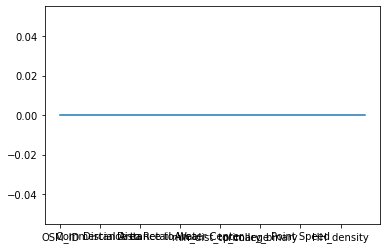

In [500]:
df_dynamic1.isnull().sum().plot()


In [501]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [502]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [503]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [504]:
#df_dynamic1.dtypes

In [505]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [506]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Application/Network_wide_2019_keplergl_eco_portland_circular_0.1_mile_buffer_data.csv")
data=data.fillna(0)
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':             OSM_ID        ID     aadb_s  aadb_s_com  \
0        4440967.0       8.0  …

In [507]:
data.head()

OSM_ID    ID    aadb_s  aadb_s_com  \
0  4440967.0   8.0  1.767123    1.191781   
1  4443830.0  10.0  0.013699    0.000000   
2  4490031.0  18.0  2.383562    1.164384   
3  4490031.0  20.0  2.369863    1.164384   
4  4490043.0  26.0  0.013699    0.000000   

                                          geometry_x  Total Commuter  \
0  LINESTRING (2312190.52868032 210704.1181040317...       41.821230   
1  LINESTRING (2313219.4280747045 210080.27647602...       95.071663   
2  LINESTRING (2320912.4450657573 208766.93728822...      114.940255   
3  LINESTRING (2320983.847516083 208568.738838992...      105.412843   
4  LINESTRING (2313369.824711446 209778.103429458...       97.226371   

   Bike Commuter  Percentage of Bike Commuter  bike commuter density  \
0       1.006807                     2.407407              32.047938   
1       0.000000                     0.000000               0.000000   
2       0.908844                     0.790710              28.929640   
3       0.915523                     0.868512              29.142257   
4       0.000000                     0.000000               0.000000   

   Intersection_Density  ...  pct_at_least_college_education  Median Age  \
0             95.493751  ...                       88.840854   37.600000   
1             95.493751  ...                       73.985166   29.248383   
2            222.818753  ...                       86.095534   32.458970   
3            222.818753  ...                       87.276625   33.515441   
4            190.987502  ...                       67.386400   28.100000   

   Median_HH_income   HH_density  population_density  employment_density  \
0      89677.000000   981.976611         1727.703619         1600.745137   
1      56266.860744  1971.749210         4649.242209         3621.947096   
2      75500.765090  2801.026711         5935.181617         4966.539935   
3      77748.880296  2592.690859         5507.732531         4647.403014   
4      49156.000000  1787.728002         4318.179535         3289.084586   

   Number of jobs         Lon        Lat  \
0      314.069921 -122.904939  45.537570   
1       13.646050 -122.891705  45.532160   
2       14.838863 -122.792355  45.521670   
3        9.722211 -122.791526  45.520252   
4      156.732635 -122.889654  45.529977   

                                          geometry_y  
0  POLYGON ((-122.90287968196084 45.5376134822209...  
1  POLYGON ((-122.88964576844958 45.5322029450627...  
2  POLYGON ((-122.79029595948434 45.5217107328246...  
3  POLYGON ((-122.7894670866724 45.52029275840388...  
4  POLYGON ((-122.8875949461186 45.53001985835873...  

[5 rows x 77 columns]

In [508]:
# save as htm file
map_2.save_to_html(file_name="Network_wide_2019_Portland_keplergl_circular_0.1_mile_buffer_data.html")

Map saved to Network_wide_2019_Portland_keplergl_circular_0.1_mile_buffer_data.html!


In [509]:
#conda list ipython

In [510]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 34368.503393411636


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT